# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Import the libraries you will be using for analysis

#Numerical and Data Analysis
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

df = pd.read_parquet('C:/Users/SonTH-MSN/Documents/upgrad/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [21]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [27]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
records_dir = "C:/Users/SonTH-MSN/Documents/upgrad/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records"

# Create a list of all the twelve files to read
file_list = [os.path.join(records_dir, file) for file in os.listdir(records_dir) if file.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # Reading the current file
        df_parquet = pd.read_parquet(file_name)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        df_parquet['tpep_pickup_datetime'] = pd.to_datetime(df_parquet['tpep_pickup_datetime'])
        df_parquet = df_parquet.sort_values(by='tpep_pickup_datetime')
    
        # Loop through dates and then loop through every hour of each date
        for each_day in df_parquet['tpep_pickup_datetime'].dt.date.unique():
            #Filter the data for the current day
            day_data = df_parquet[df_parquet['tpep_pickup_datetime'].dt.date == each_day]
            # Iterate through each hour of the selected date
            for hour in range(24):
                #Filter the data for the current hour
                hour_data = day_data[day_data['tpep_pickup_datetime'].dt.hour == hour]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df =  pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [31]:
# Store the df in csv/parquet
df.to_parquet('sampled_taxi_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [34]:
# Load the new data file
df = pd.read_parquet('sampled_taxi_data.parquet')

In [35]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8047            2  2022-12-31 23:07:51   2022-12-31 23:19:58              1.0   
4918            2  2023-01-01 00:09:41   2023-01-01 00:22:59              2.0   
3967            1  2023-01-01 00:17:57   2023-01-01 00:21:41              1.0   
4559            2  2023-01-01 00:14:13   2023-01-01 00:19:25              1.0   
2995080         2  2023-01-01 00:39:00   2023-01-01 01:02:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
8047              2.90         1.0                  N           263   
4918              2.55         1.0                  N           142   
3967              0.60         1.0                  N           236   
4559              0.69         1.0                  N           143   
2995080           7.67         NaN               None            36   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
8047               41             1        15.60    1.0      0.5        3.00   
4918              263             1        14.90    1.0      0.5        3.98   
3967              140             1         5.10    3.5      0.5        2.00   
4559              142             1         7.20    1.0      0.5        2.44   
2995080           233             0        32.55    0.0      0.5        8.62   

         tolls_amount  improvement_surcharge  total_amount  \
8047             0.00                    1.0         23.60   
4918             0.00                    1.0         23.88   
3967             0.00                    1.0         12.10   
4559             0.00                    1.0         14.64   
2995080          6.55                    1.0         51.72   

         congestion_surcharge  airport_fee  Airport_fee  
8047                      2.5          0.0          NaN  
4918                      2.5          0.0          NaN  
3967                      2.5          0.0          NaN  
4559                      2.5          0.0          NaN  
2995080                   NaN          NaN          NaN

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 8047 to 2705337
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [39]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True) #drop the old index column

#Verify if index is fixed
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:07:51   2022-12-31 23:19:58              1.0   
1         2  2023-01-01 00:09:41   2023-01-01 00:22:59              2.0   
2         1  2023-01-01 00:17:57   2023-01-01 00:21:41              1.0   
3         2  2023-01-01 00:14:13   2023-01-01 00:19:25              1.0   
4         2  2023-01-01 00:39:00   2023-01-01 01:02:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.90         1.0                  N           263            41   
1           2.55         1.0                  N           142           263   
2           0.60         1.0                  N           236           140   
3           0.69         1.0                  N           143           142   
4           7.67         NaN               None            36           233   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [41]:
# Combine the two airport fee columns

df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])

#Dop the column 'Airport_fee'
df = df.drop(columns=['Airport_fee'])

#Verify
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:07:51   2022-12-31 23:19:58              1.0   
1         2  2023-01-01 00:09:41   2023-01-01 00:22:59              2.0   
2         1  2023-01-01 00:17:57   2023-01-01 00:21:41              1.0   
3         2  2023-01-01 00:14:13   2023-01-01 00:19:25              1.0   
4         2  2023-01-01 00:39:00   2023-01-01 01:02:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.90         1.0                  N           263            41   
1           2.55         1.0                  N           142           263   
2           0.60         1.0                  N           236           140   
3           0.69         1.0                  N           143           142   
4           7.67         NaN               None            36           233   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [43]:
# check where values of fare amount are negative

rows_with_negative_fare = df[df['fare_amount'] < 0]
print(rows_with_negative_fare)

#The filtered dataframe is empty. This means there are no fare amount which is negative

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [45]:
# Analyse RatecodeID for the negative fare amounts

#Since the sampled data has no negative fare_amounts, hence RatecodeID in this case cannot be analyzed

In [46]:
# Find which columns have negative values

numerical_columns = df.select_dtypes(include=['number']).columns

negative_numerical_columns = df[numerical_columns].lt(0).any()

negative_values_columns =  negative_numerical_columns[negative_numerical_columns].index

print(f"Columns with negative values: {negative_values_columns}")

Columns with negative values: Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [47]:
# fix these negative values
negative_count_in_columns = (df[negative_values_columns] < 0).sum()
print(negative_count_in_columns)

extra                     5
mta_tax                  71
improvement_surcharge    79
total_amount             79
congestion_surcharge     51
airport_fee              13
dtype: int64


In [48]:
#Since the number of rows of negative values is not very high compared to total available data, so we will drop the negative rows

df1 = df[~(df[negative_values_columns] < 0).any(axis=1)]
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:07:51   2022-12-31 23:19:58              1.0   
1         2  2023-01-01 00:09:41   2023-01-01 00:22:59              2.0   
2         1  2023-01-01 00:17:57   2023-01-01 00:21:41              1.0   
3         2  2023-01-01 00:14:13   2023-01-01 00:19:25              1.0   
4         2  2023-01-01 00:39:00   2023-01-01 01:02:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.90         1.0                  N           263            41   
1           2.55         1.0                  N           142           263   
2           0.60         1.0                  N           236           140   
3           0.69         1.0                  N           143           142   
4           7.67         NaN               None            36           233   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        15.60    1.0      0.5        3.00          0.00   
1             1        14.90    1.0      0.5        3.98          0.00   
2             1         5.10    3.5      0.5        2.00          0.00   
3             1         7.20    1.0      0.5        2.44          0.00   
4             0        32.55    0.0      0.5        8.62          6.55   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         23.60                   2.5          0.0  
1                    1.0         23.88                   2.5          0.0  
2                    1.0         12.10                   2.5          0.0  
3                    1.0         14.64                   2.5          0.0  
4                    1.0         51.72                   NaN          NaN

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [51]:
# Find the proportion of missing values in each column

missing_values_mean = df1.isna().mean()

#Print 
print(missing_values_mean)

#So, we see that passenger_count has 3.44% and so on

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03444
trip_distance            0.00000
RatecodeID               0.03444
store_and_fwd_flag       0.03444
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03444
airport_fee              0.03444
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [53]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_passenger_count_df = df1[df1['passenger_count'].isna()]
print(missing_passenger_count_df)

#Impute missing values NaN in 'passenger_count' with mode of the column
mode_passenger_count = df1['passenger_count'].mode()[0]
df1['passenger_count'].fillna(mode_passenger_count, inplace= True)
print(df1['passenger_count'].isna().sum())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:39:00   2023-01-01 01:02:00              NaN   
9               2  2023-01-01 00:24:26   2023-01-01 00:39:24              NaN   
31              2  2023-01-01 00:34:41   2023-01-01 00:48:39              NaN   
84              2  2023-01-01 00:41:00   2023-01-01 01:23:00              NaN   
99              2  2023-01-01 00:38:00   2023-01-01 00:54:00              NaN   
...           ...                  ...                   ...              ...   
1896358         1  2023-09-30 23:19:25   2023-09-30 23:48:01              NaN   
1896364         1  2023-09-30 23:40:19   2023-10-01 00:21:41              NaN   
1896369         2  2023-09-30 23:56:09   2023-10-01 00:11:35              NaN   
1896382         2  2023-09-30 23:21:00   2023-09-30 23:52:00              NaN   
1896392         1  2023-09-30 23:41:31   2023-10-01 00:03:19              NaN   

         trip_distance  Rat

Did you find zeroes in passenger_count? Handle these.

In [55]:
# Count the number of zeroes in the 'passenger_count' column
num_zeroes = (df1['passenger_count'] == 0).sum()
print(f"Number of zeroes: {num_zeroes}")

# Again we will replace the zeroes with mode of the passenger_count
mode_passenger_count = df1['passenger_count'].mode()[0]
df1['passenger_count']= df1['passenger_count'].replace(0, mode_passenger_count)
num_zeroes = (df1['passenger_count'] == 0).sum()
print(f"Number of zeroes after imputation: {num_zeroes}")

Number of zeroes: 29002
Number of zeroes after imputation: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [74]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [76]:
# Fix missing values in 'RatecodeID'

#So, we see that RatecodeID has 3.44% missing value

# Display the rows with null values
# Impute NaN values in 'RatecodeID'
missing_ratecodeid_count_df = df1[df1['RatecodeID'].isna()]
print(missing_ratecodeid_count_df)

#Impute missing values NaN in 'RatecodeID' with mode of the column
missing_ratecodeid_mode = df1['RatecodeID'].mode()[0]
print(f"Mode of RatecodeID: {missing_ratecodeid_mode}")
df1['RatecodeID'].fillna(missing_ratecodeid_mode, inplace= True)
print(df1['RatecodeID'].isna().sum())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:39:00   2023-01-01 01:02:00              1.0   
9               2  2023-01-01 00:24:26   2023-01-01 00:39:24              1.0   
31              2  2023-01-01 00:34:41   2023-01-01 00:48:39              1.0   
84              2  2023-01-01 00:41:00   2023-01-01 01:23:00              1.0   
99              2  2023-01-01 00:38:00   2023-01-01 00:54:00              1.0   
...           ...                  ...                   ...              ...   
1896358         1  2023-09-30 23:19:25   2023-09-30 23:48:01              1.0   
1896364         1  2023-09-30 23:40:19   2023-10-01 00:21:41              1.0   
1896369         2  2023-09-30 23:56:09   2023-10-01 00:11:35              1.0   
1896382         2  2023-09-30 23:21:00   2023-09-30 23:52:00              1.0   
1896392         1  2023-09-30 23:41:31   2023-10-01 00:03:19              1.0   

         trip_distance  Rat

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [79]:
# handle null values in congestion_surcharge

#So, we see that congestion_surcharge has 3.44% missing value

#Impute missing values NaN in 'congestion_surcharge' with mode of the column
congestion_surcharge_mode = df1['congestion_surcharge'].mode()[0]
print(f"Mode of congestion_surcharge: {congestion_surcharge_mode}")
df1['congestion_surcharge'].fillna(congestion_surcharge_mode, inplace= True)
print(df1['congestion_surcharge'].isna().sum())


Mode of congestion_surcharge: 2.5
0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [82]:
# Handle any remaining missing values

# Find the proportion of missing values in remaining  column

missing_values_mean = df1.isna().mean()

#Print 
print(missing_values_mean)

# So, we see airport_fee and store_and_fwd_flag has missing values

#store_and_fwd_flag value imputation 
#Impute missing values NaN in 'store_and_fwd_flag' with mode of the column
store_and_fwd_flag_mode = df1['store_and_fwd_flag'].mode()[0]
print(f"Mode of store_and_fwd_flag_mode: {store_and_fwd_flag_mode}")
df1['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode, inplace= True)
print(df1['store_and_fwd_flag'].isna().sum())

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.00000
trip_distance            0.00000
RatecodeID               0.00000
store_and_fwd_flag       0.03444
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.00000
airport_fee              0.03444
dtype: float64
Mode of store_and_fwd_flag_mode: N
0


In [84]:
#airport_fee value imputation 
#Impute missing values NaN in 'airport_fee' with mode of the column
airport_fee_mode = df1['airport_fee'].mode()[0]
print(f"Mode of airport_fee: {airport_fee_mode}")
df1['airport_fee'].fillna(airport_fee_mode, inplace= True)
print(df1['airport_fee'].isna().sum())

Mode of airport_fee: 0.0
0


In [86]:
#Verify if there is any column left with missing values
missing_values_mean = df1.isna().mean()

#Print 
print(missing_values_mean)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [90]:
# Describe the data and check if there are any potential outliers present

# Check for potential out of place values in various columns
print(df1.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896317e+06                     1896317                     1896317   
mean   1.735869e+00  2023-07-02 19:59:15.354345  2023-07-02 20:16:45.427057   
min    1.000000e+00         2022-12-31 23:07:51         2022-12-31 23:19:58   
25%    1.000000e+00         2023-04-02 16:10:17         2023-04-02 16:30:50   
50%    2.000000e+00         2023-06-27 15:47:33         2023-06-27 16:06:22   
75%    2.000000e+00         2023-10-06 19:40:24         2023-10-06 19:58:10   
max    6.000000e+00         2023-12-31 23:56:25         2024-01-01 16:35:22   
std    4.456875e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896317e+06   1.896317e+06  1.896317e+06  1.896317e+06   
mean      1.373409e+00   4.116448e+00  1.623966e+00  1.652552e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

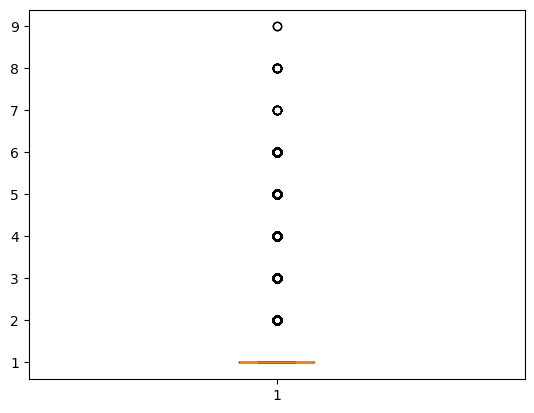

(1896293, 19)

In [95]:
# Step 0: remove passenger_count > 6

#Create a boxplot of the passenger_count column
plt.boxplot(df1.passenger_count)
plt.show()
df1.passenger_count.describe()

#Lets remove passenger_count > 6
df1 = df1[df1.passenger_count <= 6]
df1.shape

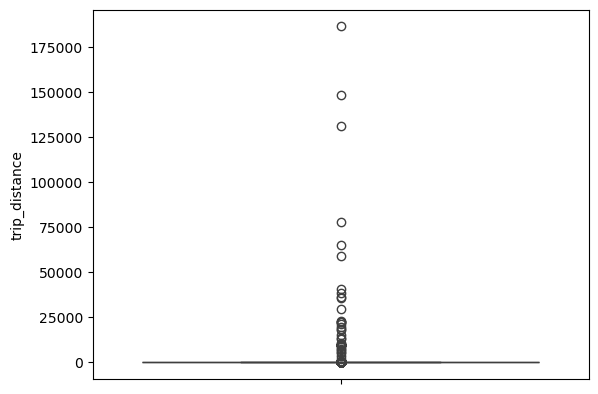

count    1.896293e+06
mean     4.116471e+00
std      2.299361e+02
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.420000e+00
max      1.865141e+05
Name: trip_distance, dtype: float64

In [97]:
# Lets analyze trip_distance to remove the outliers

#Create a boxplot of the trip_distance column
sns.boxplot(y=df1["trip_distance"])
plt.show()
df1.trip_distance.describe()

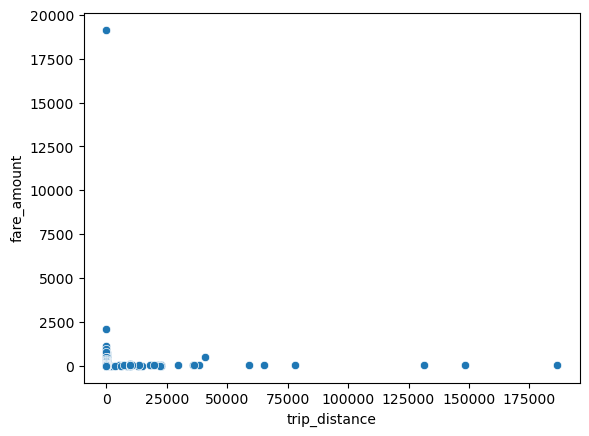

In [99]:
sns.scatterplot(x=df1["trip_distance"], y= df1["fare_amount"])
plt.show()

In [101]:
# Outlier removal
#Step 1: Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
outlier1 = df1[((df1['trip_distance'] < 5) & (df1['fare_amount'] > 300))]
print(f"Step 1: Count of records with above outlier: {outlier1.shape}")
df_cleaned1 = df1[~((df1['trip_distance'] < 5) & (df1['fare_amount'] > 300))]
print(f"Step 1:Count of records after removing above outlier: {df_cleaned1.shape}")

#Step 2: Remove entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
outlier2 = df_cleaned1[((df_cleaned1['trip_distance'] == 0) & (df_cleaned1['fare_amount'] == 0) & (df_cleaned1['PULocationID'] != df_cleaned1['DOLocationID']))]
print(f"Step 2: Count of records with above outlier: {outlier2.shape}")
df_cleaned2= df_cleaned1[~((df_cleaned1['trip_distance'] == 0) & (df_cleaned1['fare_amount'] == 0) & (df_cleaned1['PULocationID'] != df_cleaned1['DOLocationID']))]
print(f"Step 2:Count of records after removing above outlier: {df_cleaned2.shape}")

#Step 3: Remove entries where trip_distance > 250 as we see there are not much entries above 250
outlier3 = df_cleaned2[(df_cleaned2['trip_distance'] > 250)]
print(f"Step 3: Count of records with above outlier: {outlier3.shape}")
df_cleaned3 = df_cleaned2[~(df_cleaned2['trip_distance'] > 250)]
print(f"Step 3:Count of records after removing above outlier: {df_cleaned3.shape}")

#Step 4: Remove entries with invalid payment_type like 0
outlier4 = df_cleaned3[(df_cleaned3['payment_type'] == 0)]
print(f"Step 4: Count of records with above outlier: {outlier4.shape}")
df_cleaned4 = df_cleaned3[~(df_cleaned3['payment_type'] == 0)]
print(f"Step 4:Count of records after removing above outlier: {df_cleaned4.shape}")

Step 1: Count of records with above outlier: (48, 19)
Step 1:Count of records after removing above outlier: (1896245, 19)
Step 2: Count of records with above outlier: (80, 19)
Step 2:Count of records after removing above outlier: (1896165, 19)
Step 3: Count of records with above outlier: (45, 19)
Step 3:Count of records after removing above outlier: (1896120, 19)
Step 4: Count of records with above outlier: (65285, 19)
Step 4:Count of records after removing above outlier: (1830835, 19)


In [103]:
#Step 5: Remove entries with invalid RatecodeID
#We see valid values of RatecodeID is 1,2,3,4,5,6. Lets check the values which is present
df_cleaned4['RatecodeID'].value_counts()

# We see invalid RatecodeID 99 present. Lets remove this
df = df_cleaned4[(df_cleaned4['RatecodeID'] <= 6)]
print(f"Step 5:Count of records after removing above outlier: {df.shape}")

Step 5:Count of records after removing above outlier: (1820196, 19)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [106]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

Below monetary parameters are <b>'Numerical'</b> columns

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

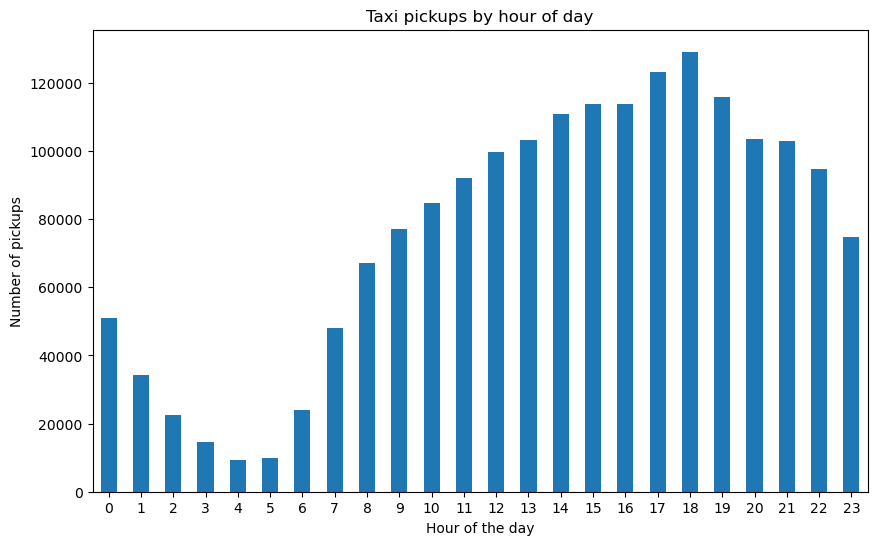

In [112]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

#Extract hour, day of the week, month from the tpep_pickup_datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['month'] = df['tpep_pickup_datetime'].dt.month

pickups_by_hour = df.groupby('hour').size()

plt.figure(figsize=(10,6))
pickups_by_hour.plot(kind='bar')
plt.title('Taxi pickups by hour of day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of pickups')
plt.xticks(rotation=0)
plt.show()

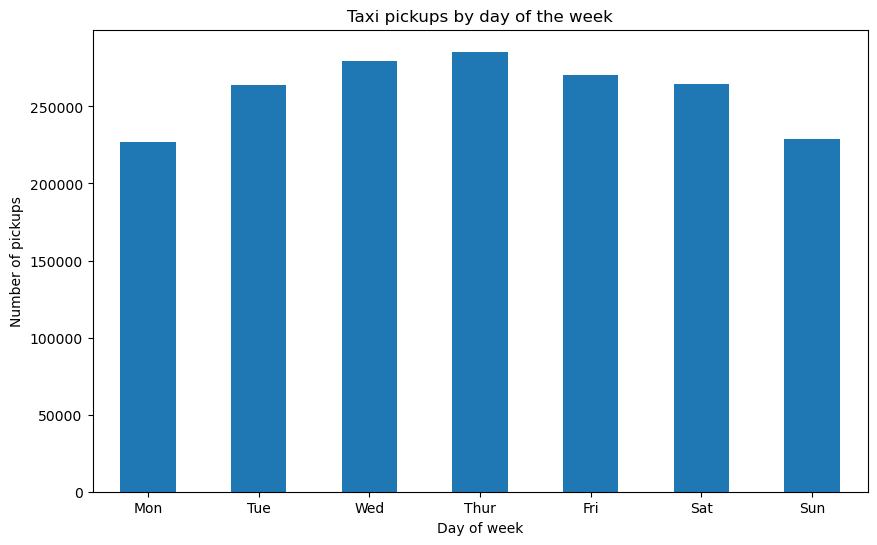

In [114]:
# Find and show the daily trends in taxi pickups (days of the week)

pickups_by_day_of_week = df.groupby('day_of_week').size()

plt.figure(figsize=(10,6))
pickups_by_day_of_week.plot(kind='bar')
plt.title('Taxi pickups by day of the week')
plt.xlabel('Day of week')
plt.ylabel('Number of pickups')
plt.xticks(ticks=range(7), labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'], rotation=0)
plt.show()

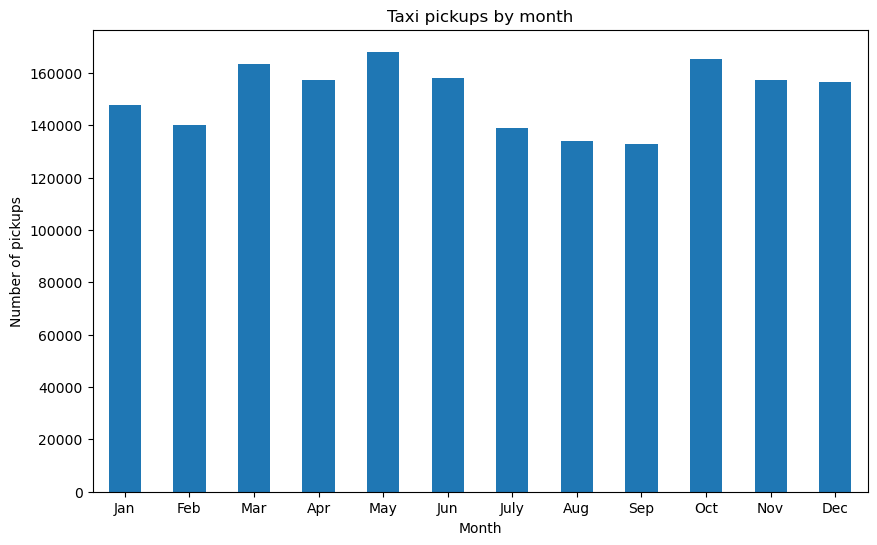

In [116]:
# Show the monthly trends in pickups

pickups_by_month = df.groupby('month').size()

plt.figure(figsize=(10,6))
pickups_by_month.plot(kind='bar')
plt.title('Taxi pickups by month')
plt.xlabel('Month')
plt.ylabel('Number of pickups')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [120]:
# Analyse the above parameters

print("Financial parameters with zero or negative values:")
print(f"fare_amount: {df[(df['fare_amount'] <= 0)].shape[0]}")
print(f"tip_amount: {df[(df['tip_amount'] <= 0)].shape[0]}")
print(f"total_amount: {df[(df['total_amount'] <= 0)].shape[0]}")
print(f"trip_distance: {df[(df['trip_distance'] <= 0)].shape[0]}")

Financial parameters with zero or negative values:
fare_amount: 456
tip_amount: 398757
total_amount: 233
trip_distance: 20925


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [124]:
# Create a df with non zero entries for the selected parameters.

#Since it is mentioned that distance might be 0 in cases where pickup and drop is in the same zone, so we will only drop rows where trip_distnace is zero in different pickup and drop zone
# Also, incase of cash payments, tip amount can be missing. So, we will not drop tip amount zero rows for cash payments i.e payment_type = 2

df_filtered = df[~((df['fare_amount'] <= 0) | (df['total_amount'] <= 0) | ((df['trip_distance'] <= 0) & (df['PULocationID'] != df['DOLocationID'])) | ((df['tip_amount'] <= 0) & (df['payment_type'] !=2)))]
df_filtered

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:07:51   2022-12-31 23:19:58              1.0   
1               2  2023-01-01 00:09:41   2023-01-01 00:22:59              2.0   
2               1  2023-01-01 00:17:57   2023-01-01 00:21:41              1.0   
3               2  2023-01-01 00:14:13   2023-01-01 00:19:25              1.0   
5               1  2023-01-01 00:59:05   2023-01-01 01:03:35              2.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:28:20   2023-10-01 01:00:57              1.0   
1896396         2  2023-09-30 23:52:18   2023-10-01 00:10:15              1.0   
1896397         2  2023-09-30 23:23:50   2023-09-30 23:34:59              1.0   
1896398         2  2023-09-30 23:04:02   2023-09-30 23:35:11              1.0   
1896399         2  2023-09-30 23:42:27   2023-09-30 23:48:03              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 2.90         1.0                  N           263   
1                 2.55         1.0                  N           142   
2                 0.60         1.0                  N           236   
3                 0.69         1.0                  N           143   
5                 0.70         1.0                  N           239   
...                ...         ...                ...           ...   
1896395           1.89         1.0                  N           107   
1896396          12.73         1.0                  N           138   
1896397           1.17         1.0                  N            79   
1896398           8.52         1.0                  N           161   
1896399           0.47         1.0                  N            48   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                  41             1  ...      0.5        3.00          0.00   
1                 263             1  ...      0.5        3.98          0.00   
2                 140             1  ...      0.5        2.00          0.00   
3                 142             1  ...      0.5        2.44          0.00   
5                 239             2  ...      0.5        0.00          0.00   
...               ...           ...  ...      ...         ...           ...   
1896395           170             2  ...      0.5        0.00          0.00   
1896396           127             1  ...      0.5       12.94          6.94   
1896397            45             1  ...      0.5        3.28          0.00   
1896398            49             1  ...      0.5        8.74          0.00   
1896399           230             1  ...      0.5        2.44          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         23.60                   2.5   
1                          1.0         23.88                   2.5   
2                          1.0         12.10                   2.5   
3                          1.0         14.64                   2.5   
5                          1.0         11.50                   2.5   
...                        ...           ...                   ...   
1896395                    1.0         16.40                   2.5   
1896396                    1.0         77.63                   0.0   
1896397                    1.0         19.68                   2.5   
1896398                    1.0         52.44                   2.5   
1896399                    1.0         14.64                   2.5   

         airport_fee  hour  day_of_week  month  
0               0.00    23            5     12  
1               0.00     0            6      1  
2               0.00     0            6      1  
3               0.00     0            6      1  
5               0.00     0            6      1  
...              ...   ...          ...    ...  
1896395         0.00    23            5      9  
1

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    month  total_amount
0       1    3865522.99
1       2    3661606.20
2       3    4404145.86
3       4    4313719.15
4       5    4718794.19
5       6    4422327.80
6       7    3813683.58
7       8    3708005.94
8       9    3816471.94
9      10    4696293.44
10     11    4401381.90
11     12    4359968.15


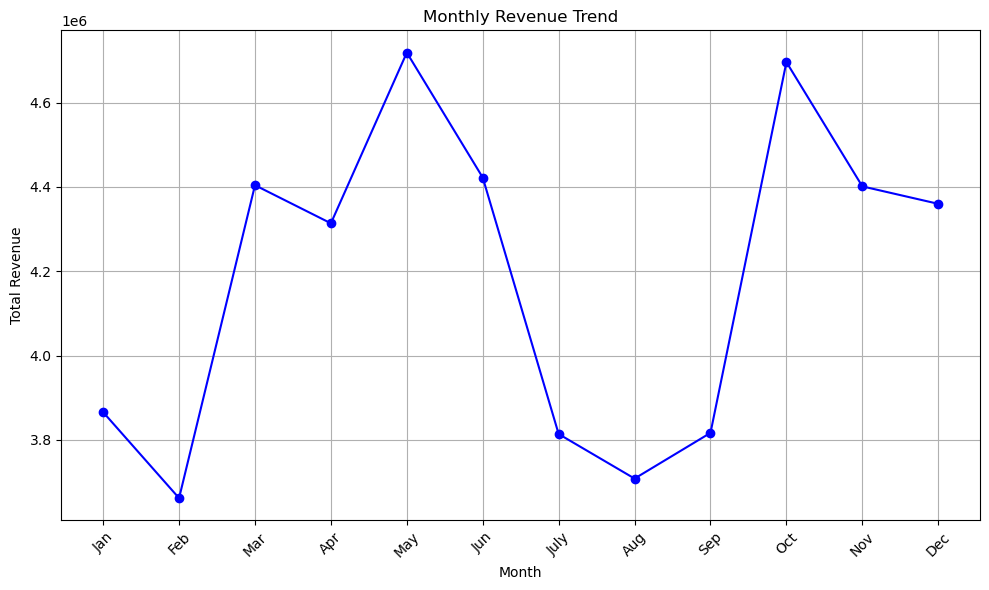

In [127]:
# Group data by month and analyse monthly revenue

#Group by month and calculate the total revenue
monthly_revenue = df_filtered.groupby("month")["total_amount"].sum().reset_index()

#Sort the values by month
monthly_revenue = monthly_revenue.sort_values("month")

#Show the result
print(monthly_revenue)

#Plot - Let's go with line plot
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue["month"], monthly_revenue["total_amount"], marker='o', color='b')

plt.title("Monthly Revenue Trend", fontsize = 12)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Total Revenue", fontsize=10)
plt.xticks(monthly_revenue["month"], ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount  proportion
0      Q1   11931275.05    0.237760
1      Q2   13454841.14    0.268121
2      Q3   11338161.46    0.225941
3      Q4   13457643.49    0.268177


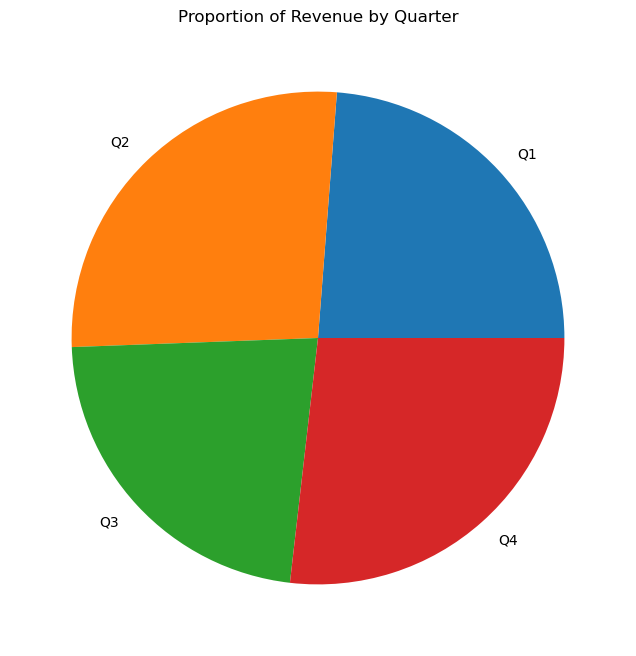

In [130]:
# Calculate proportion of each quarter

#Lets define a function to determine the quarter
def determine_quarter(month):
    if month in [1,2,3]:
        return 'Q1'
    elif month in [4,5,6]:
        return 'Q2'
    elif month in [7,8,9]:
        return 'Q3'
    else:
        return 'Q4'

# Add a 'quarter' column to the dataframe based on the 'month' column
df_filtered['quarter'] = df_filtered['month'].apply(determine_quarter)

# Group by 'quarter' and calculate total revenue for each quarter
quarterly_revenue = df_filtered.groupby('quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()

# Calculate the proportion of each quarter's revenue
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

# Display the proportions for each quarter
print(quarterly_revenue)

# Plotting the proportions of each quarter's revenue
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'])
plt.title('Proportion of Revenue by Quarter', fontsize=12)

# Show the plot
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

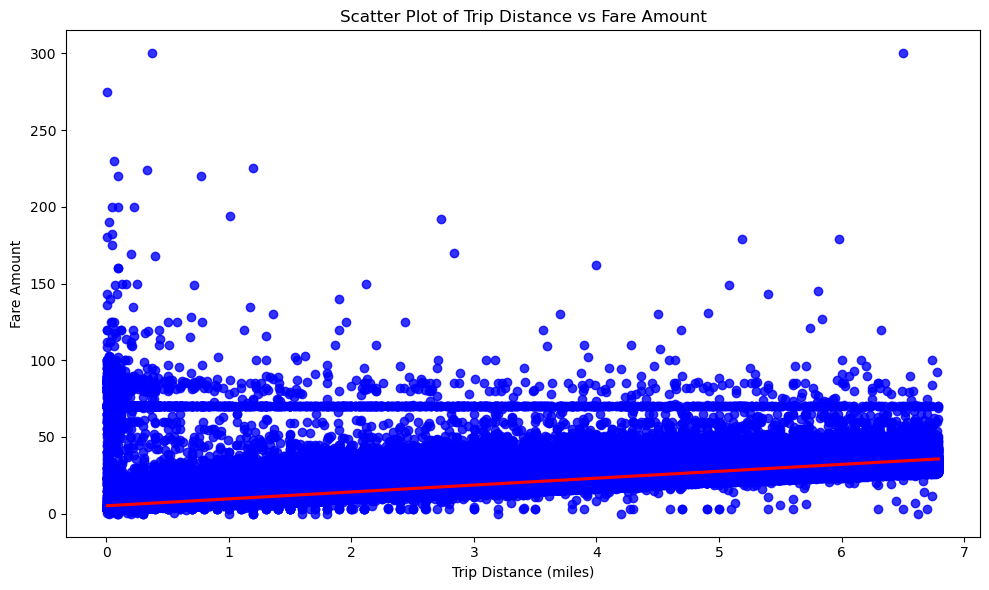

Correlation coefficient between trip_distance and fare_amount: 0.80


In [135]:
# Show how trip fare is affected by distance

#Dropping rows with trip_distance=0 
df_filtered = df_filtered[~(df_filtered['trip_distance'] <= 0)]

#Removing outliers from trip_distance
# Calculate IQR (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_filtered['trip_distance'].quantile(0.25)
Q3 = df_filtered['trip_distance'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with 'trip_distance' outside of these bounds
df_cleaned = df_filtered[(df_filtered['trip_distance'] >= lower_bound) & (df_filtered['trip_distance'] <= upper_bound)]

#IQR = df_filtered['trip_distance'].quantile(0.75) - df_filtered['trip_distance'].quantile(0.25)
# Define the lower and upper bounds for acceptable values
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with 'trip_distance' outside of these bounds
#df_cleaned = df_filtered[(df_filtered['trip_distance'] >= lower_bound) & (df_filtered['trip_distance'] <= upper_bound)]

#Both trip distance and fare_amount is numerical values. So, we will use a scatter plot with regression line
plt.figure(figsize=(10, 6))
# Plot scatter plot with regression line
sns.regplot(data=df_cleaned, x='trip_distance', y='fare_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


# Add title and labels
plt.title('Scatter Plot of Trip Distance vs Fare Amount', fontsize=12)
plt.xlabel('Trip Distance (miles)', fontsize=10)
plt.ylabel('Fare Amount', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Correlation
correlation = df_cleaned['trip_distance'].corr(df['fare_amount'])
print(f'Correlation coefficient between trip_distance and fare_amount: {correlation:.2f}')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

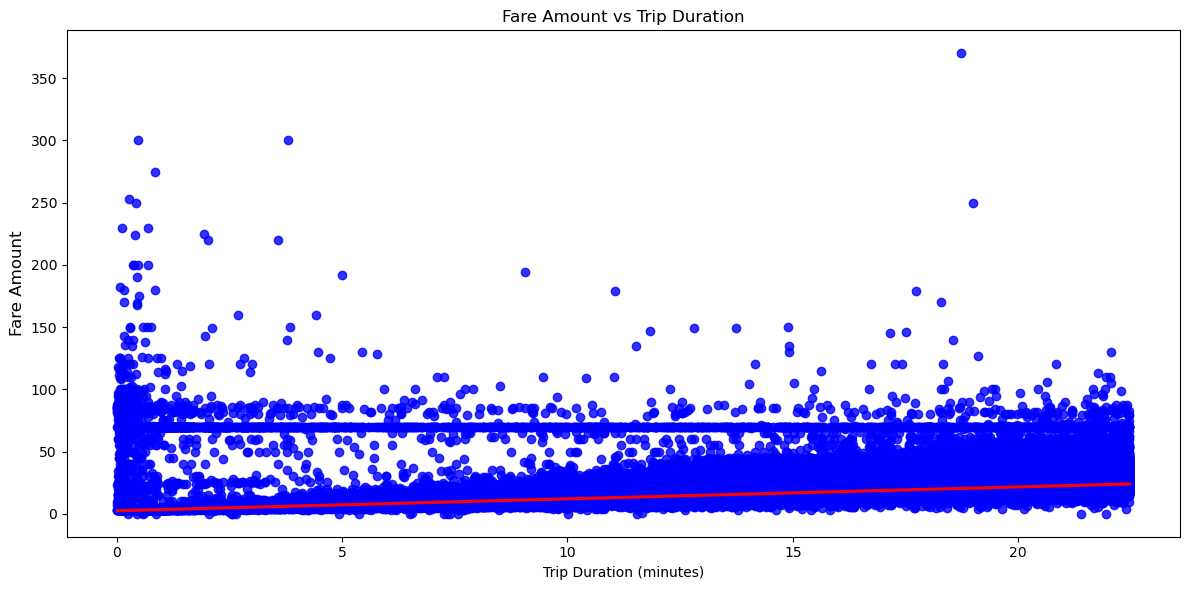

Correlation coefficient between fare_amount and trip_duration: 0.72


In [137]:
# Show relationship between fare and trip duration

#Calculate the trip_duration
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

#Filter rows with negative trip duration and zero
df_filtered = df_filtered[~(df_filtered['trip_duration'] <= 0)]

#Removing outliers from trip_duration
# Calculate IQR (Interquartile Range)
IQR = df_filtered['trip_duration'].quantile(0.75) - df_filtered['trip_duration'].quantile(0.25)
# Define the lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with 'trip_duration' outside of these bounds
df_cleaned = df_filtered[(df_filtered['trip_duration'] >= lower_bound) & (df_filtered['trip_duration'] <= upper_bound)]

#Visualize and calculate the correlation between fare_amount and trip_duration
plt.figure(figsize=(12, 6))
sns.regplot(data=df_cleaned, x='trip_duration', y='fare_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Fare Amount vs Trip Duration', fontsize=12)
plt.xlabel('Trip Duration (minutes)', fontsize=10)
plt.ylabel('Fare Amount', fontsize=12)
plt.tight_layout()
plt.show()

#Correlation
corr_fare_duration = df_cleaned['fare_amount'].corr(df_cleaned['trip_duration'])
print(f'Correlation coefficient between fare_amount and trip_duration: {corr_fare_duration:.2f}')


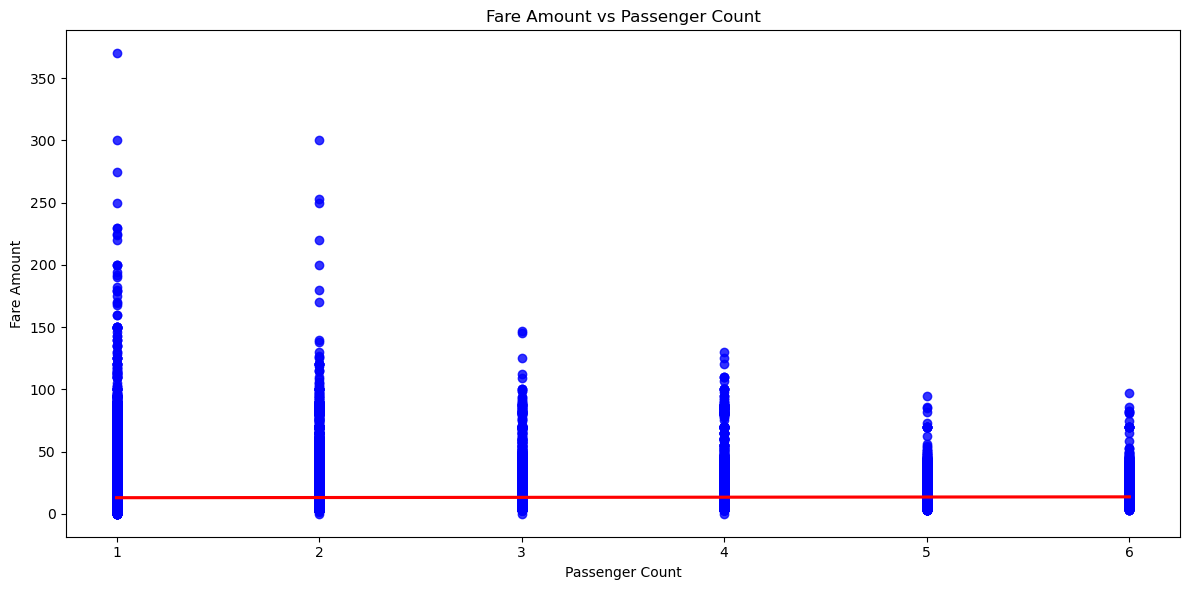

Correlation coefficient between fare_amount and passenger_count: 0.02


In [139]:
# Show relationship between fare_amount and passenger_count

plt.figure(figsize=(12, 6))
# Plot scatter plot with regression line
sns.regplot(data=df_cleaned, x='passenger_count', y='fare_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Fare Amount vs Passenger Count', fontsize=12)
plt.xlabel('Passenger Count', fontsize=10)
plt.ylabel('Fare Amount', fontsize=10)
plt.tight_layout()
plt.show()

corr_fare_passenger = df_cleaned['fare_amount'].corr(df_cleaned['passenger_count'])
print(f'Correlation coefficient between fare_amount and passenger_count: {corr_fare_passenger:.2f}')

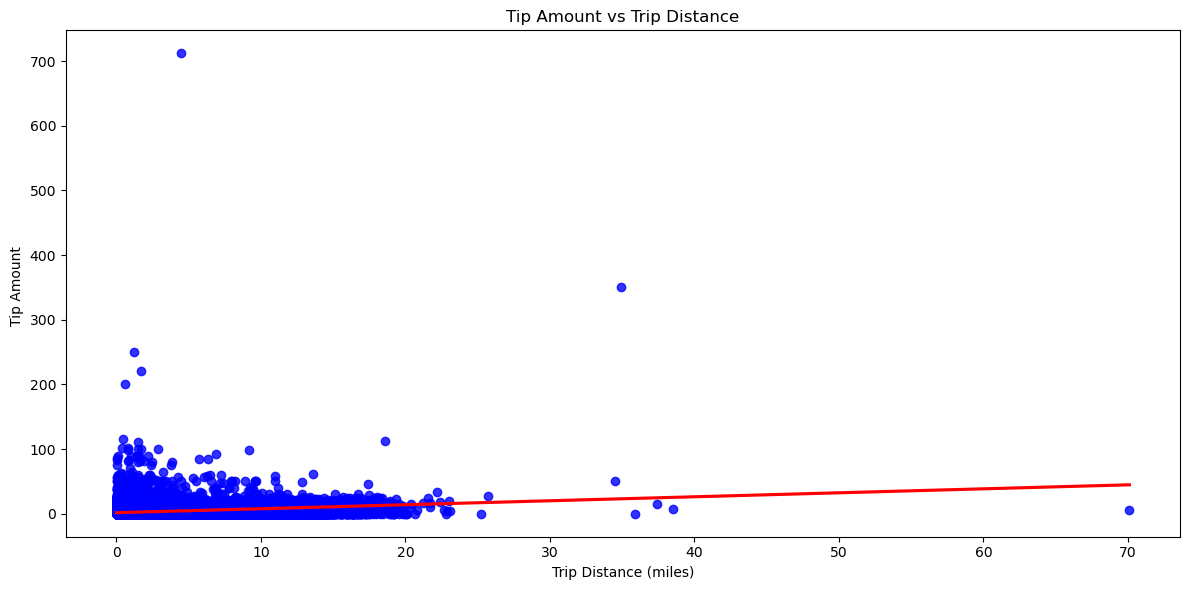

Correlation coefficient between Tip Amount and Trip Distance: 0.43


In [141]:
# Show relationship between tip and trip distance

plt.figure(figsize=(12, 6))
# Plot scatter plot with regression line
sns.regplot(data=df_cleaned, x='trip_distance', y='tip_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Tip Amount vs Trip Distance', fontsize=12)
plt.xlabel('Trip Distance (miles)', fontsize=10)
plt.ylabel('Tip Amount ', fontsize=10)
plt.tight_layout()
plt.show()

# Correlation coefficient for tip_amount and trip_distance
corr_tip_distance = df_cleaned['tip_amount'].corr(df_cleaned['trip_distance'])
print(f'Correlation coefficient between Tip Amount and Trip Distance: {corr_tip_distance:.2f}')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type_labelled
Credit Card    1118121
Cash            242971
No Charge            6
Dispute              6
Name: count, dtype: int64


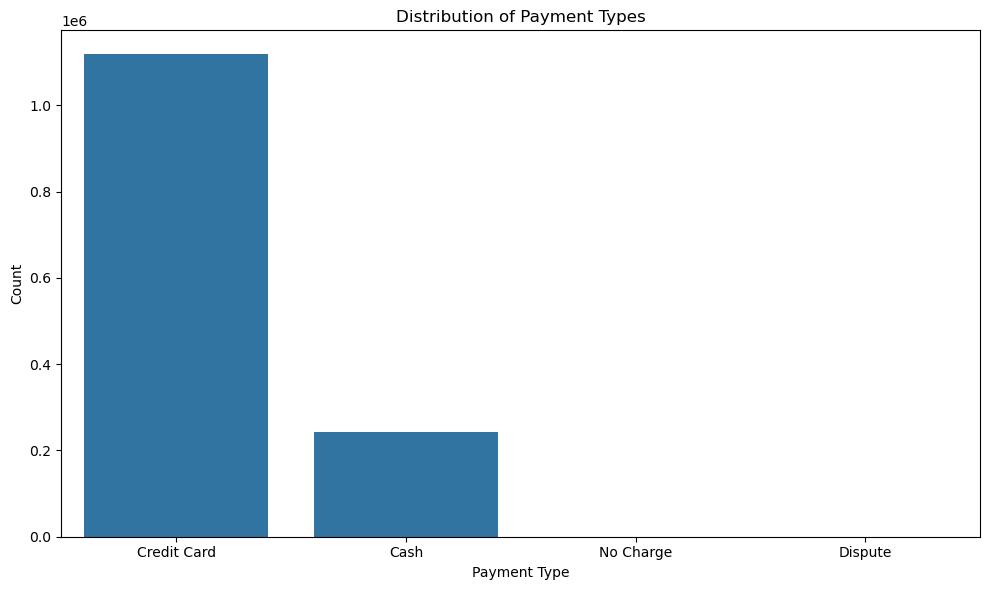

In [144]:
# Analyse the distribution of different payment types (payment_type).

# Define a mapping of payment type codes to labels
payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Map the numeric values to labels
df_cleaned['payment_type_labelled'] =df_cleaned['payment_type'].map(payment_type_mapping)

# Count the occurrences of each payment type (using the labeled column)
payment_type_counts = df_cleaned['payment_type_labelled'].value_counts()

# Print the payment type counts
print(payment_type_counts)

# Plot the distribution of payment types using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values)

# Add title and labels
plt.title('Distribution of Payment Types', fontsize=12)
plt.xlabel('Payment Type', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [150]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/16.2 MB 3.8 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.2 MB 5.1 MB/s eta 0:00:03
   ----------- ---------------------------- 4.5/16.2 MB 5.6 MB/s eta 0:00:03
   -------------- ------------------------- 6.0/16.2 MB 5.9 MB/s eta 0:00:02
   --------------------- ------------------ 8.7/16.2 MB 7.1 MB/s eta 0:00:02
   ----------------------------- ---------- 11.8/16.2 MB 8.3 MB/s eta 0:00:01
   ------------------------------------- -- 15.2/16.2 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------- ------------------- 3.1/6.3 MB 15.4 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.3 MB 16.1 MB/s eta 0:00:01
   --------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [155]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("C:/Users/SonTH-MSN/Documents/upgrad/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

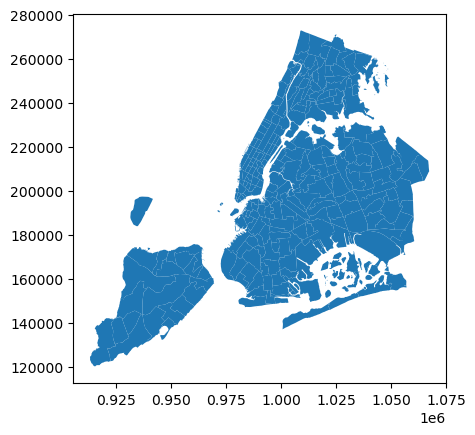

In [158]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [162]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(df_cleaned, zones , left_on='PULocationID', right_on='LocationID', how='inner')

# View the result of the join
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:07:51   2022-12-31 23:19:58              1.0   
1         2  2023-01-01 00:09:41   2023-01-01 00:22:59              2.0   
2         1  2023-01-01 00:17:57   2023-01-01 00:21:41              1.0   
3         2  2023-01-01 00:14:13   2023-01-01 00:19:25              1.0   
4         1  2023-01-01 00:59:05   2023-01-01 01:03:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.90         1.0                  N           263            41   
1           2.55         1.0                  N           142           263   
2           0.60         1.0                  N           236           140   
3           0.69         1.0                  N           143           142   
4           0.70         1.0                  N           239           239   

   payment_type  ...  quarter  trip_duration  payment_type_labelled  OBJECTID  \
0             1  ...       Q4      12.116667            Credit Card       263   
1             1  ...       Q1      13.300000            Credit Card       142   
2             1  ...       Q1       3.733333            Credit Card       236   
3             1  ...       Q1       5.200000            Credit Card       143   
4             2  ...       Q1       4.500000                   Cash       239   

   Shape_Leng  Shape_Area                   zone  LocationID    borough  \
0    0.037017    0.000066         Yorkville West         263  Manhattan   
1    0.038176    0.000076    Lincoln Square East         142  Manhattan   
2    0.044252    0.000103  Upper East Side North         236  Manhattan   
3    0.054180    0.000151    Lincoln Square West         143  Manhattan   
4    0.063626    0.000205  Upper West Side South         239  Manhattan   

                                            geometry  
0  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  POLYGON ((989380.305 218980.247, 989359.803 21...  
2  POLYGON ((995940.048 221122.92, 995812.322 220...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((991168.979 226252.992, 991955.565 22...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [165]:
# Group data by location and calculate the number of trips
trip_count = merged_df.groupby('LocationID').size().reset_index(name='total_num_trips')

# View the result
trip_count

LocationID  total_num_trips
0             1               29
1             3                2
2             4             1446
3             6               18
4             7              478
..          ...              ...
227         259                3
228         260              219
229         261             5747
230         262            20457
231         263            30052

[232 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [168]:
# Merge trip counts back to the zones GeoDataFrame

# Merge trip_counts with df2 on 'locationID' column
merged_trip_count_df = pd.merge(zones, trip_count, how='left', on='LocationID')

# View the result
merged_trip_count_df


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     total_num_trips  
0               29.0  
1                NaN  
2                2.0  
3             1446.0  
4                NaN  
..               ...  
258              3.0  
259            219.0  
260           5747.0  
261          20457.0  
262          30052.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

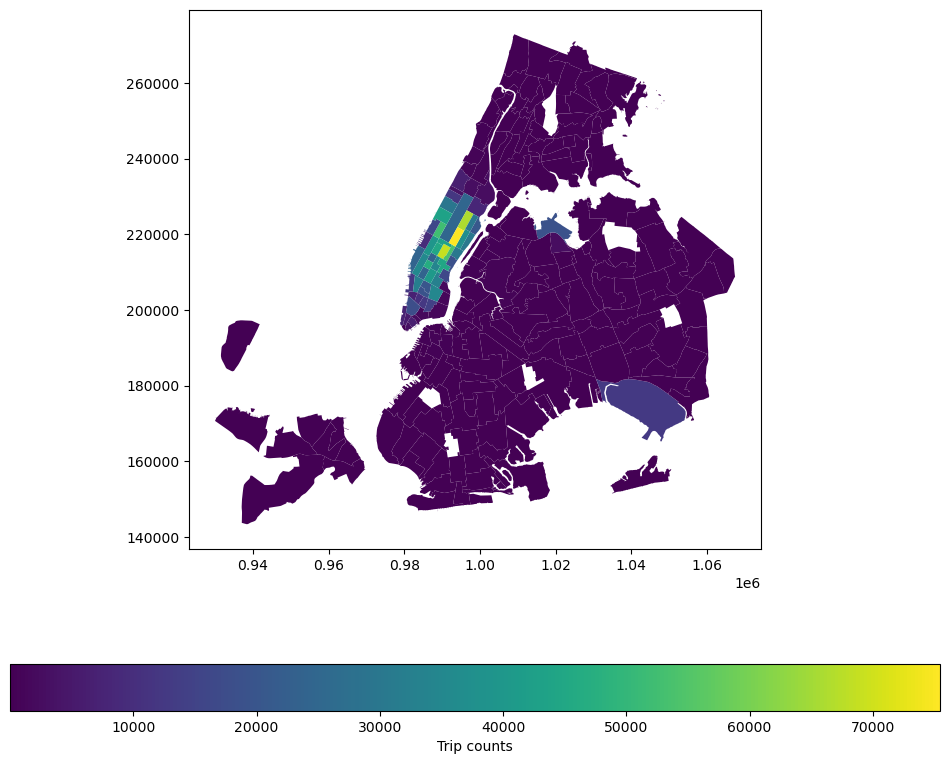

In [173]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
merged_trip_count_df.plot(column = 'total_num_trips', ax = ax, legend = True, legend_kwds = {'label': "Trip counts", 'orientation': "horizontal"})

plt.show()

In [175]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = merged_trip_count_df.sort_values(by='total_num_trips', ascending=False)
sorted_zones

OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
236       237    0.042213    0.000096      Upper East Side South         237   
160       161    0.035804    0.000072             Midtown Center         161   
235       236    0.044252    0.000103      Upper East Side North         236   
161       162    0.035270    0.000048               Midtown East         162   
141       142    0.038176    0.000076        Lincoln Square East         142   
..        ...         ...         ...                        ...         ...   
198       199    0.077809    0.000289              Rikers Island         199   
200       201    0.130404    0.000619              Rockaway Park         201   
203       204    0.101912    0.000641          Rossville/Woodrow         204   
205       206    0.212757    0.000944  Saint George/New Brighton         206   
213       214    0.135300    0.000812   South Beach/Dongan Hills         214   

           borough                                           geometry  \
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
141      Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
..             ...                                                ...   
198          Bronx  POLYGON ((1015023.713 230286.759, 1015093.307 ...   
200         Queens  POLYGON ((1034661.735 153320.591, 1034718.155 ...   
203  Staten Island  POLYGON ((927766.539 141772.465, 927864.475 14...   
205  Staten Island  POLYGON ((961436.305 175473.03, 961460.942 175...   
213  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   

     total_num_trips  
236          75439.0  
160          68733.0  
235          66223.0  
161          53899.0  
141          52399.0  
..               ...  
198              NaN  
200              NaN  
203              NaN  
205              NaN  
213              NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [185]:
# Find routes which have the slowest speeds at different times of the day

merged_df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
merged_df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#Extract the hour of the day from pickup_datetime
merged_df['hour'] = merged_df['tpep_pickup_datetime'].dt.hour

# Calculate trip duration (in minutes or seconds)
merged_df['trip_duration'] = (merged_df['tpep_dropoff_datetime'] - merged_df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

# Group by hour, route (PULocationID, DOLocationID), and calculate average trip distance and duration
grouped_df = merged_df.groupby(['hour', 'PULocationID', 'DOLocationID']).agg(
    avg_trip_duration=('trip_duration', 'mean'),
    avg_trip_distance=('trip_distance', 'mean')
).reset_index()

# Calculate speed (distance / duration)
grouped_df['speed'] = grouped_df['avg_trip_distance'] / grouped_df['avg_trip_duration']

# Sort by hour and speed to find slowest routes for each hour
slowest_routes = grouped_df.sort_values(by=['hour', 'speed'], ascending=[True, True])

#  Display slowest routes for each hour of the day 
top_slowest_routes = slowest_routes.groupby('hour').head(5)  # Top 5 slowest routes for each hour

# Display the result
top_slowest_routes[['hour', 'PULocationID', 'DOLocationID', 'speed']]


hour  PULocationID  DOLocationID     speed
103     0.0            16            16  0.001284
142     0.0            33           181  0.001490
2206    0.0           180           132  0.001824
33      0.0             7           129  0.002000
714     0.0            88            88  0.004972
...     ...           ...           ...       ...
84823  23.0           226           226  0.000303
82135  23.0             1             1  0.000579
83469  23.0           134           134  0.001622
82248  23.0            17            17  0.002151
84670  23.0           202           202  0.007457

[120 rows x 4 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

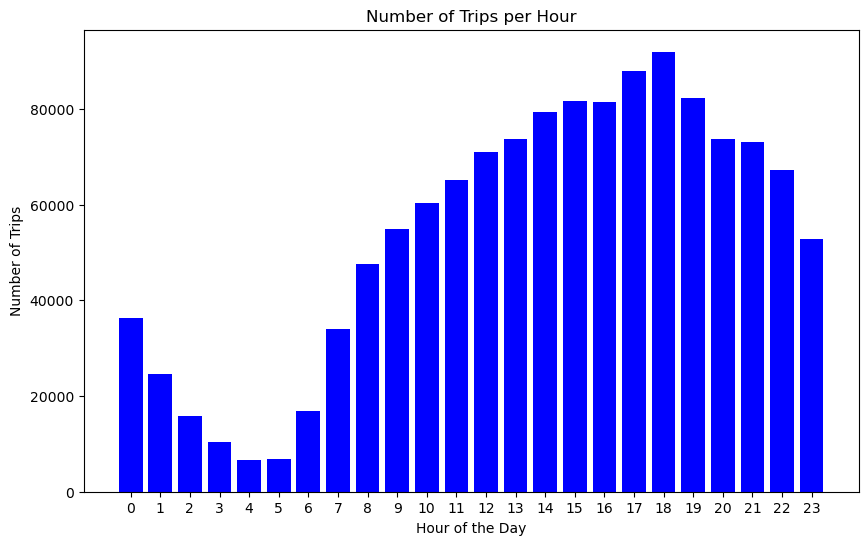

The busiest hour is 18.0 with 91927.0 trips.


In [189]:
# Visualise the number of trips per hour and find the busiest hour

# Group by hour and count the number of trips
trips_per_hour = merged_df.groupby('hour').size().reset_index(name='num_trips')

# Visualize the number of trips per hour with a bar plot
plt.figure(figsize=(10, 6))
plt.bar(trips_per_hour['hour'], trips_per_hour['num_trips'], color='blue')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # x-axis ticks for each hour
plt.show()

# Find the busiest hour
busy_hour = trips_per_hour.loc[trips_per_hour['num_trips'].idxmax()]
print(f"The busiest hour is {busy_hour['hour']} with {busy_hour['num_trips']} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

The five busiest hours with actual trip counts are:
    hour  actual_num_trips
18  18.0         1838540.0
17  17.0         1756100.0
19  19.0         1647040.0
15  15.0         1630920.0
16  16.0         1626420.0


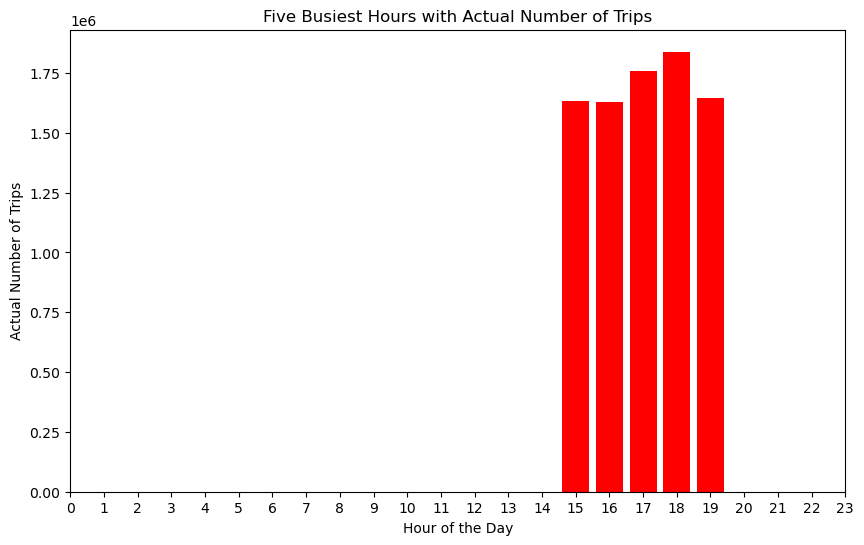

In [193]:
# Scale up the number of trips

sampling_ratio = 0.05  # actual sampling ratio used

# Scale the number of trips up by the sampling ratio
trips_per_hour['actual_num_trips'] = trips_per_hour['num_trips'] / sampling_ratio

# Sort by actual number of trips in descending order
busiest_hours = trips_per_hour.sort_values(by='actual_num_trips', ascending=False).head(5)

#  Display the busiest hours and their actual trip counts
print("The five busiest hours with actual trip counts are:")
print(busiest_hours[['hour', 'actual_num_trips']])

# Visualize the actual number of trips in the busiest hours
plt.figure(figsize=(10, 6))
plt.bar(busiest_hours['hour'], busiest_hours['actual_num_trips'], color='red')
plt.title('Five Busiest Hours with Actual Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Actual Number of Trips')
plt.xticks(range(24))  # x-axis  ticks for each hour
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Figure size 1200x600 with 0 Axes>

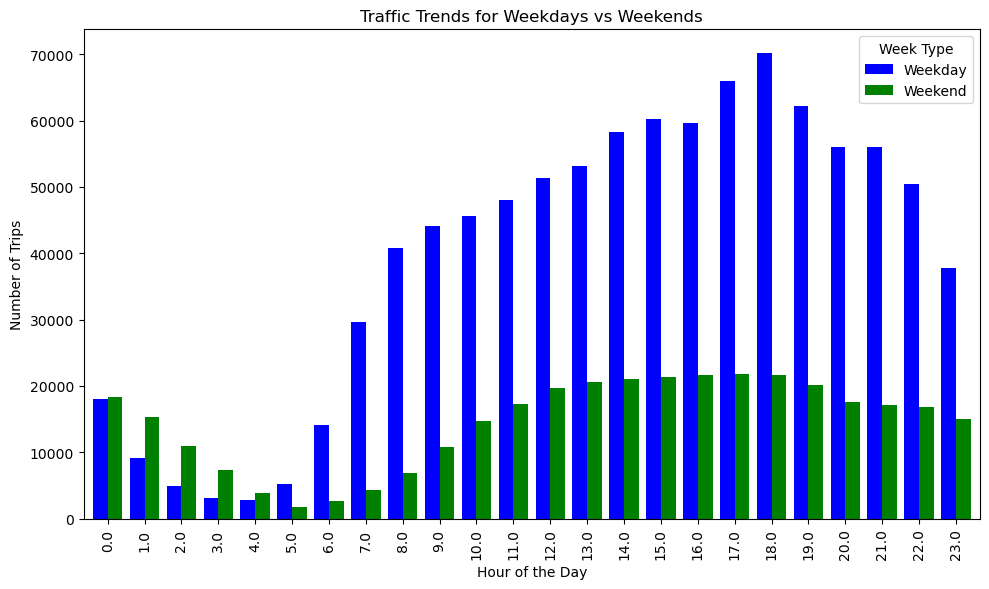

Total trips for weekdays vs weekends:
week_type
Weekday    946448
Weekend    348696
Name: num_trips_week_type, dtype: int64


In [196]:
# Compare traffic trends for the week days and weekends

# Extract the day of the week (0=Monday, 6=Sunday)
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.weekday

#  Categorize into weekdays (0-4) and weekends (5-6)
merged_df['week_type'] = merged_df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by 'week_type' and hour to get the number of trips
trips_by_weektype = merged_df.groupby(['week_type', 'hour']).size().reset_index(name='num_trips_week_type')

# pivot the data to make weekdays and weekends side-by-side
trips_pivot = trips_by_weektype.pivot(index='hour', columns='week_type', values='num_trips_week_type')

# Plot the traffic trends for weekdays and weekends
plt.figure(figsize=(12, 6))
trips_pivot.plot(kind='bar', width=0.8, figsize=(10,6), color=['blue', 'green'])
plt.title('Traffic Trends for Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # x-axis  ticks for each hour
plt.legend(title='Week Type')
plt.tight_layout()
plt.show()

# Compare trends by calculating the total trips for weekdays and weekends
total_trips_by_weektype = trips_by_weektype.groupby('week_type')['num_trips_week_type'].sum()
print("Total trips for weekdays vs weekends:")
print(total_trips_by_weektype)


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

      hour  PULocationID  num_pickups
100    0.0           237         2042
68     0.0           161         1865
99     0.0           236         1750
69     0.0           162         1409
57     0.0           142         1393
...    ...           ...          ...
3040  23.0           170         1858
3045  23.0           186         1829
3065  23.0           230         1766
3036  23.0           163         1724
3073  23.0           239         1716

[240 rows x 3 columns]
      hour  DOLocationID  num_dropoffs
173    0.0           236          1893
174    0.0           237          1730
117    0.0           161          1513
125    0.0           170          1261
102    0.0           142          1182
...    ...           ...           ...
4646  23.0           141          1681
4665  23.0           162          1657
4724  23.0           239          1597
4719  23.0           234          1466
4715  23.0           230          1434

[240 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

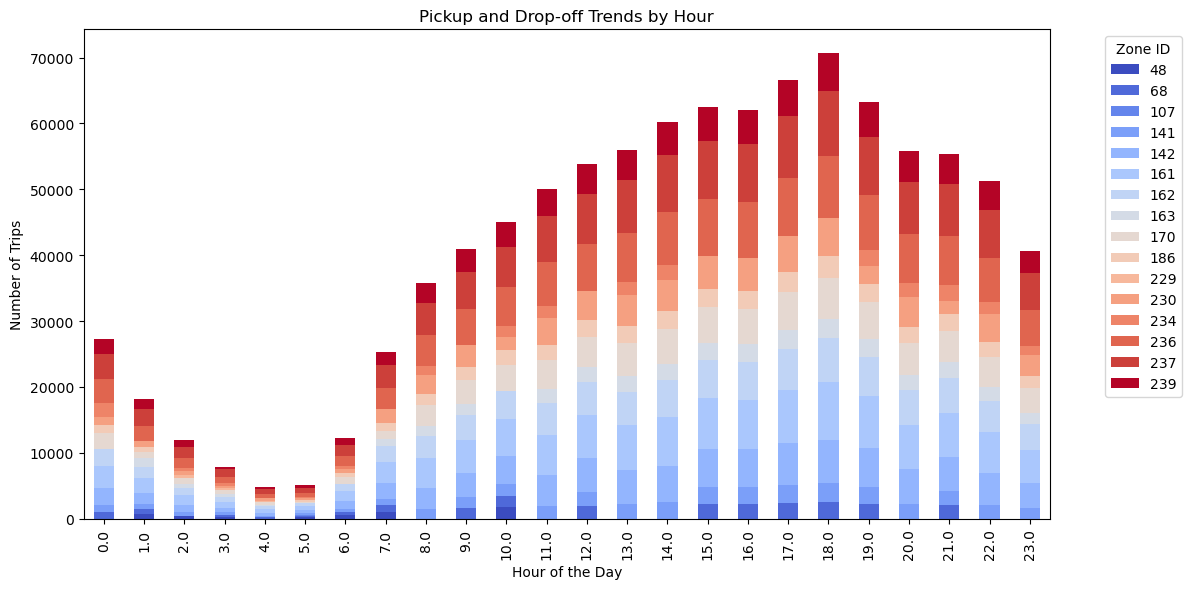

In [200]:
# Find top 10 pickup and dropoff zones

# Group by hour and PULocationID (pickup location), then count the number of pickups
pickup_counts = merged_df.groupby(['hour', 'PULocationID']).size().reset_index(name='num_pickups')
dropoff_counts = merged_df.groupby(['hour', 'DOLocationID']).size().reset_index(name='num_dropoffs')

# Sort by number of pickups in descending order within each hour
pickup_counts_sorted = pickup_counts.sort_values(by=['hour', 'num_pickups'], ascending=[True, False])
dropoff_counts_sorted = dropoff_counts.sort_values(by=['hour', 'num_dropoffs'], ascending=[True, False])

# Select the top 10 zones for each hour
top_10_zones_per_hour = pickup_counts_sorted.groupby('hour').head(10)
top_10_dropoff_zones_per_hour = dropoff_counts_sorted.groupby('hour').head(10)

# Display the top 10 zones with high hourly pickups
print(top_10_zones_per_hour[['hour', 'PULocationID', 'num_pickups']])

#Display the top 10 drop-off zones with high hourly drop-offs
print(top_10_dropoff_zones_per_hour[['hour', 'DOLocationID', 'num_dropoffs']])

pickup_pivot = top_10_zones_per_hour.pivot(index='hour', columns='PULocationID', values='num_pickups').fillna(0)
dropoff_pivot = top_10_dropoff_zones_per_hour.pivot(index='hour', columns='DOLocationID', values='num_dropoffs').fillna(0)

# Merge both pickup and dropoff data for easy comparison
combined_data = pickup_pivot.add(dropoff_pivot, fill_value=0)

#  Plot the pickup and drop-off trends for each hour
plt.figure(figsize=(12, 6))
combined_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.title('Pickup and Drop-off Trends by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Ensure x-axis has ticks for each hour
plt.legend(title='Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [203]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Group by 'PULocationID' (pickup location) and 'DOLocationID' (dropoff location)
pickup_counts = merged_df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = merged_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge pickup and dropoff counts on the location IDs
pickup_dropoff_counts = pd.merge(pickup_counts, dropoff_counts, 
                                  left_on='PULocationID', right_on='DOLocationID', 
                                  how='outer')  # 'outer' join to keep all zones even if only one of the counts exists

# Fill missing values with 0 (in case there were locations with only pickups or dropoffs)
pickup_dropoff_counts.fillna(0, inplace=True)

# Calculate the pickup to dropoff ratio
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / pickup_dropoff_counts['dropoff_count']

# Sort by the ratio
pickup_dropoff_counts_sorted = pickup_dropoff_counts.sort_values(by='pickup_dropoff_ratio', ascending=False)

# Display the 10 highest and 10 lowest ratios
highest_ratios = pickup_dropoff_counts_sorted.head(10)
lowest_ratios = pickup_dropoff_counts_sorted.tail(10)

# Show the results
print("Top 10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios[['PULocationID', 'pickup_dropoff_ratio']])

print("\nTop 10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios[['PULocationID', 'pickup_dropoff_ratio']])


Top 10 Highest Pickup/Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
144         156.0                   inf
65           70.0              5.875566
120         132.0              5.504198
126         138.0              3.332635
106         118.0              2.000000
9            11.0              1.500000
172         186.0              1.462841
102         114.0              1.391586
39           43.0              1.326034
150         162.0              1.276653

Top 10 Lowest Pickup/Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
26            0.0                   0.0
159           0.0                   0.0
27            0.0                   0.0
164           0.0                   0.0
173           0.0                   0.0
53            0.0                   0.0
186           0.0                   0.0
41            0.0                   0.0
52            0.0                   0.0
247           0.0                   0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [206]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Create a new column to identify if the trip occurred during night hours (11 PM to 5 AM)
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour
merged_df['dropoff_hour'] = merged_df['tpep_dropoff_datetime'].dt.hour

# Filter for trips occurring between 11 PM (23:00) and 5 AM (05:00)
night_trips = merged_df[(merged_df['pickup_hour'] >= 23) | (merged_df['pickup_hour'] <= 5) | 
                 (merged_df['dropoff_hour'] >= 23) | (merged_df['dropoff_hour'] <= 5)]

# Group by 'PULocationID' (pickup location) and 'DOLocationID' (dropoff location)
pickup_counts_night = night_trips.groupby('PULocationID').size().reset_index(name='night_pickups')
dropoff_counts_night = night_trips.groupby('DOLocationID').size().reset_index(name='night_dropoffs')

# Merge pickup and dropoff counts on location IDs
night_counts = pd.merge(pickup_counts_night, dropoff_counts_night, 
                        left_on='PULocationID', right_on='DOLocationID', 
                        how='outer')

# Fill missing values with 0 (in case there were locations with only pickups or dropoffs during the night)
night_counts.fillna(0, inplace=True)

# Sort by night pickups and dropoffs
night_counts_sorted = night_counts.sort_values(by=['night_pickups', 'night_dropoffs'], ascending=False)

# Display the zones with highest traffic during night hours
top_night_pickup_dropoff_zones = night_counts_sorted[['PULocationID', 'night_pickups', 'night_dropoffs']].head(10)

# Show the result
print("Top 10 Zones with High Pickup and Dropoff Traffic During Night Hours:")
print(top_night_pickup_dropoff_zones)


Top 10 Zones with High Pickup and Dropoff Traffic During Night Hours:
     PULocationID  night_pickups  night_dropoffs
204         237.0         9423.0          8278.0
140         161.0         8823.0          6783.0
203         236.0         7999.0          8702.0
141         162.0         6743.0          5170.0
122         142.0         6585.0          5332.0
197         230.0         5721.0          4573.0
149         170.0         5651.0          5687.0
160         186.0         5535.0          4024.0
142         163.0         5437.0          4326.0
206         239.0         5433.0          5196.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [209]:
# Filter for night hours (11 PM to 5 AM)

# Define nighttime as 11 PM to 5 AM
merged_df['is_night'] = merged_df['pickup_hour'].apply(lambda x: 23 <= x or x <= 5)

# Calculate total revenue (fare_amount)
merged_df['total_revenue'] = merged_df['total_amount']

# Calculate total revenue during nighttime
nighttime_revenue = merged_df[merged_df['is_night']]['total_revenue'].sum()

# Calculate total revenue during daytime (everything else)
daytime_revenue = merged_df[~merged_df['is_night']]['total_revenue'].sum()

# Calculate the total revenue for the entire dataset
total_revenue = merged_df['total_revenue'].sum()

# Calculate the revenue share for nighttime and daytime
nighttime_revenue_share = nighttime_revenue / total_revenue * 100
daytime_revenue_share = daytime_revenue / total_revenue * 100

# Print the results
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Nighttime Revenue: ${nighttime_revenue:.2f}")
print(f"Daytime Revenue: ${daytime_revenue:.2f}")
print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")


Total Revenue: $27729739.15
Nighttime Revenue: $3165997.36
Daytime Revenue: $24563741.79
Nighttime Revenue Share: 11.42%
Daytime Revenue Share: 88.58%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [213]:
# Analyse the fare per mile per passenger for different passenger counts

# Ensure that 'trip_distance' is not zero to avoid division errors
merged_df = merged_df[merged_df['trip_distance'] > 0]

# Calculate the fare per mile for each trip
merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance']

# Calculate fare per mile per passenger
merged_df['fare_per_mile_per_passenger'] = merged_df['fare_per_mile'] / merged_df['passenger_count']

# Group by 'passenger_count' and calculate the average fare per mile per passenger
average_fare_per_passenger = merged_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Sort the results to see the fare per mile per passenger for each passenger count
average_fare_per_passenger_sorted = average_fare_per_passenger.sort_values(by='fare_per_mile_per_passenger', ascending=True)

# Display the results
print(average_fare_per_passenger_sorted)


   passenger_count  fare_per_mile_per_passenger
5              6.0                     1.447524
4              5.0                     1.684773
2              3.0                     3.967131
3              4.0                     4.355842
1              2.0                     7.311920
0              1.0                    11.004542


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [216]:
# Compare the average fare per mile for different days and for different times of the day

#Create columns for the hour of the day and day of the week
merged_df['hour_of_day'] = merged_df['tpep_pickup_datetime'].dt.hour
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate fare per mile
merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance']

# Group by hour of the day and calculate the average fare per mile
avg_fare_per_mile_by_hour = merged_df.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()

# Group by day of the week and calculate the average fare per mile
avg_fare_per_mile_by_day =merged_df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Map the day of the week to a string 
avg_fare_per_mile_by_day['day_of_week'] = avg_fare_per_mile_by_day['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Display the results
print("Average Fare per Mile by Hour of the Day:")
print(avg_fare_per_mile_by_hour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avg_fare_per_mile_by_day)


Average Fare per Mile by Hour of the Day:
    hour_of_day  fare_per_mile
0           0.0      10.992603
1           1.0      12.218227
2           2.0      11.387133
3           3.0      12.261034
4           4.0      12.181742
5           5.0      12.405095
6           6.0      11.845382
7           7.0      11.236331
8           8.0      11.560951
9           9.0      11.471586
10         10.0      10.792789
11         11.0      11.187802
12         12.0      12.332967
13         13.0      11.457815
14         14.0      11.783341
15         15.0      12.788350
16         16.0      11.850714
17         17.0      10.606082
18         18.0      11.515662
19         19.0      11.551154
20         20.0      12.475302
21         21.0      12.375414
22         22.0      11.474577
23         23.0      10.766716

Average Fare per Mile by Day of the Week:
  day_of_week  fare_per_mile
0      Monday      11.605388
1     Tuesday      11.595236
2   Wednesday      11.804668
3    Thursday      11.36

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

hour_of_day       0.0        1.0        2.0        3.0        4.0        5.0   \
VendorID                                                                        
1             8.277679   8.286048   8.337595   8.381595   8.198733   8.199212   
2            11.917774  13.548485  12.430200  13.621070  13.478702  13.950825   

hour_of_day       6.0        7.0        8.0        9.0   ...       14.0  \
VendorID                                                 ...              
1             8.160859   8.206616   8.317929   8.533792  ...   8.610556   
2            13.136193  12.291525  12.684213  12.507432  ...  12.884705   

hour_of_day       15.0       16.0       17.0       18.0       19.0       20.0  \
VendorID                                                                        
1             8.554954   8.654289   8.485409   8.436818   8.542408   8.421614   
2            14.267055  12.973677  11.338655  12.585342  12.594482  13.862535   

hour_of_day       21.0       22.0       23.0  
Ve

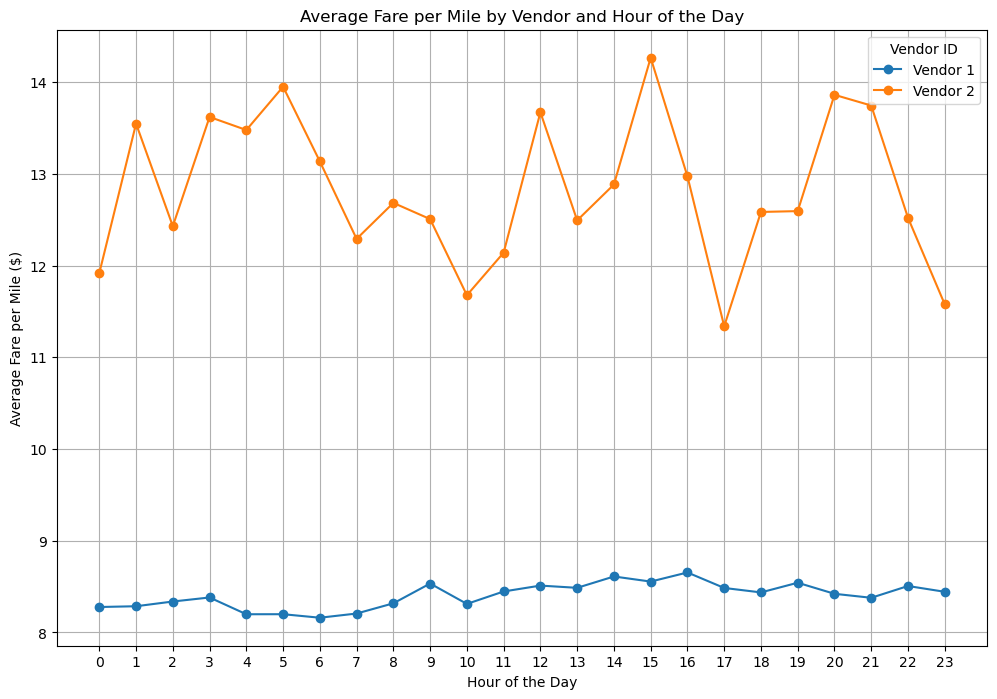

In [219]:
# Compare fare per mile for different vendors

# Calculate fare per mile
df['fare_per_mile'] = merged_df['fare_amount'] / df['trip_distance']

# Group by 'vendor_id' and 'hour_of_day' to calculate the average fare per mile
avg_fare_per_mile_by_vendor_hour = merged_df.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Pivot the table for better visualization (vendor_id on rows, hour_of_day on columns)
pivot_table = avg_fare_per_mile_by_vendor_hour.pivot(index='VendorID', columns='hour_of_day', values='fare_per_mile')

# Display the results
print(pivot_table)

# Plot the results for each vendor

plt.figure(figsize=(12, 8))
for vendor_id in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[vendor_id], marker='o', label=f"Vendor {vendor_id}")

plt.title('Average Fare per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


distance_category  Up to 2 miles  2 to 5 miles  More than 5 miles
VendorID                                                         
1                       9.518761      5.977548           4.302475
2                      15.960294      6.156666           4.370930


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

<Figure size 1200x800 with 0 Axes>

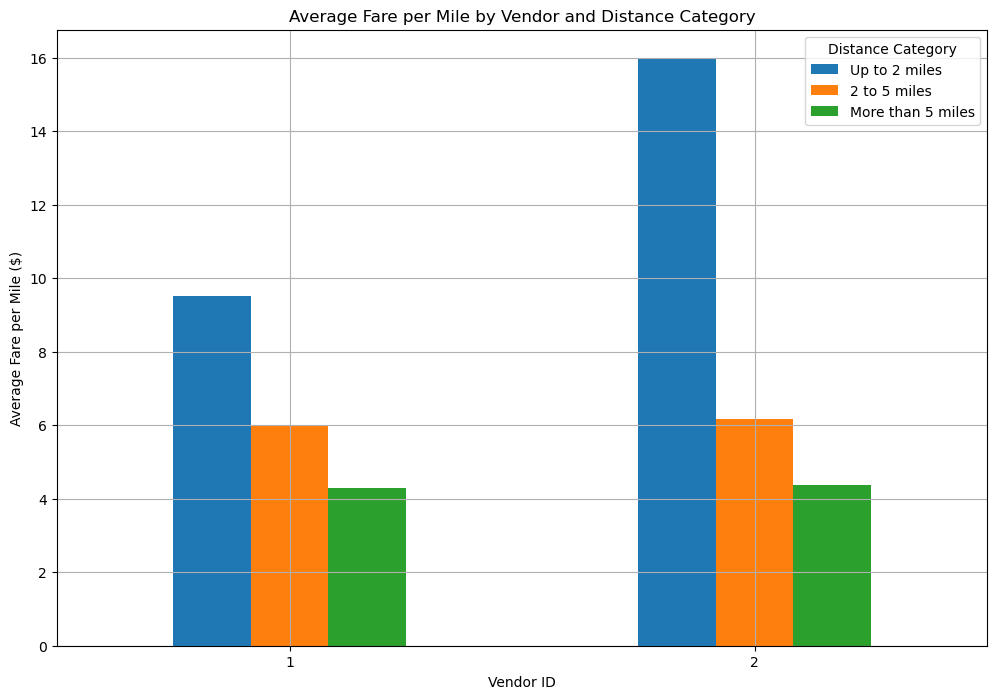

In [222]:
# Defining distance tiers

# Categorize trips into different distance ranges
conditions = [
    (merged_df['trip_distance'] <= 2),         # Up to 2 miles
    (merged_df['trip_distance'] > 2) & (merged_df['trip_distance'] <= 5),  # Between 2 and 5 miles
    (merged_df['trip_distance'] > 5)           # More than 5 miles
]

# Assign labels for each category
labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Create a new column for distance category
merged_df['distance_category'] = pd.cut(merged_df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels, right=True)

# Group by 'vendor_id' and 'distance_category' and calculate the average fare per mile
avg_fare_per_mile_by_vendor_distance = merged_df.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()

# Pivot the table for better comparison (vendor_id on rows, distance_category on columns)
pivot_table = avg_fare_per_mile_by_vendor_distance.pivot(index='VendorID', columns='distance_category', values='fare_per_mile')

# Display the pivot table
print(pivot_table)

# Plot the results for each vendor
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Average Fare per Mile by Vendor and Distance Category')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=0)
plt.legend(title='Distance Category')
plt.grid(True)
plt.tight_layout

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

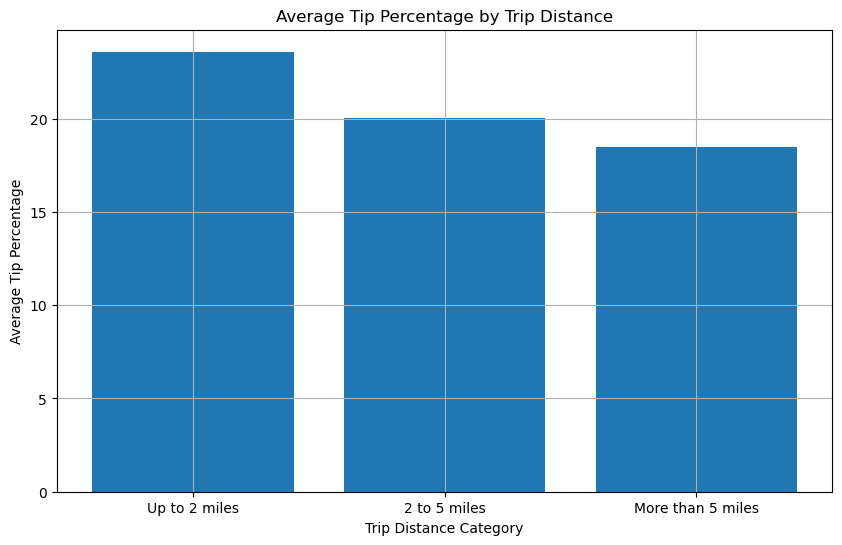

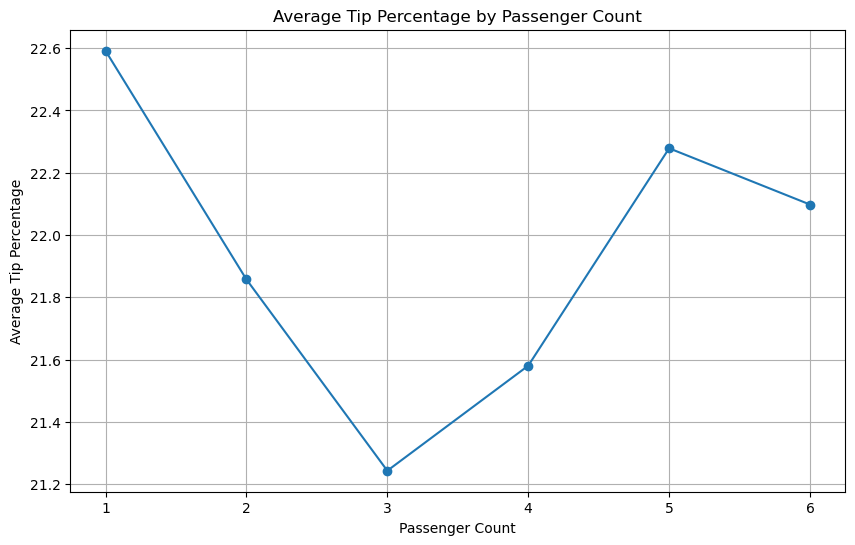

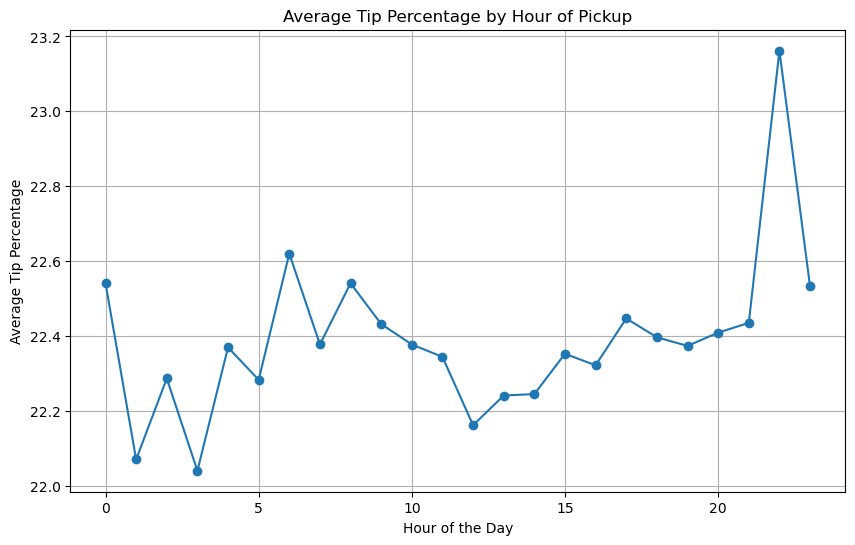

                 trip_distance  passenger_count  hour_of_day  tip_percentage
trip_distance         1.000000         0.006849    -0.009888       -0.041616
passenger_count       0.006849         1.000000     0.000096       -0.006235
hour_of_day          -0.009888         0.000096     1.000000        0.001765
tip_percentage       -0.041616        -0.006235     0.001765        1.000000


In [226]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate the tip percentage
merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

# 1. Analyze tip percentage by trip distance
# Categorizing trip distances
conditions = [
    (merged_df['trip_distance'] <= 2),  # Up to 2 miles
    (merged_df['trip_distance'] > 2) & (merged_df['trip_distance'] <= 5),  # Between 2 and 5 miles
    (merged_df['trip_distance'] > 5)  # More than 5 miles
]

labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
merged_df['distance_category'] = pd.cut(merged_df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels, right=True)

# Group by distance category and calculate average tip percentage
avg_tip_by_distance = merged_df.groupby('distance_category')['tip_percentage'].mean().reset_index()

# 2. Analyze tip percentage by passenger count
avg_tip_by_passenger_count = merged_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# 3. Analyze tip percentage by hour of pickup
avg_tip_by_hour = merged_df.groupby('hour_of_day')['tip_percentage'].mean().reset_index()

# 4. Plot the results for analysis
# Plot tip percentage by distance category
plt.figure(figsize=(10, 6))
plt.bar(avg_tip_by_distance['distance_category'], avg_tip_by_distance['tip_percentage'])
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance Category')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

# Plot tip percentage by passenger count
plt.figure(figsize=(10, 6))
plt.plot(avg_tip_by_passenger_count['passenger_count'], avg_tip_by_passenger_count['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

# Plot tip percentage by hour of day
plt.figure(figsize=(10, 6))
plt.plot(avg_tip_by_hour['hour_of_day'], avg_tip_by_hour['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

# 5. Factors Leading to Low Tip Percentages
# We will look at correlations to see if there are any patterns

# Correlation between trip distance, passenger count, and tip percentage
correlation = merged_df[['trip_distance', 'passenger_count', 'hour_of_day','tip_percentage']].corr()
print(correlation)

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low Tip Group (tip percentage < 10%)
trip_distance       1.944516
fare_amount        13.253292
tip_amount          0.188398
passenger_count     1.422264
dtype: float64

High Tip Group (tip percentage > 25%)
trip_distance       1.637765
fare_amount        11.553276
tip_amount          3.597151
passenger_count     1.362178
dtype: float64


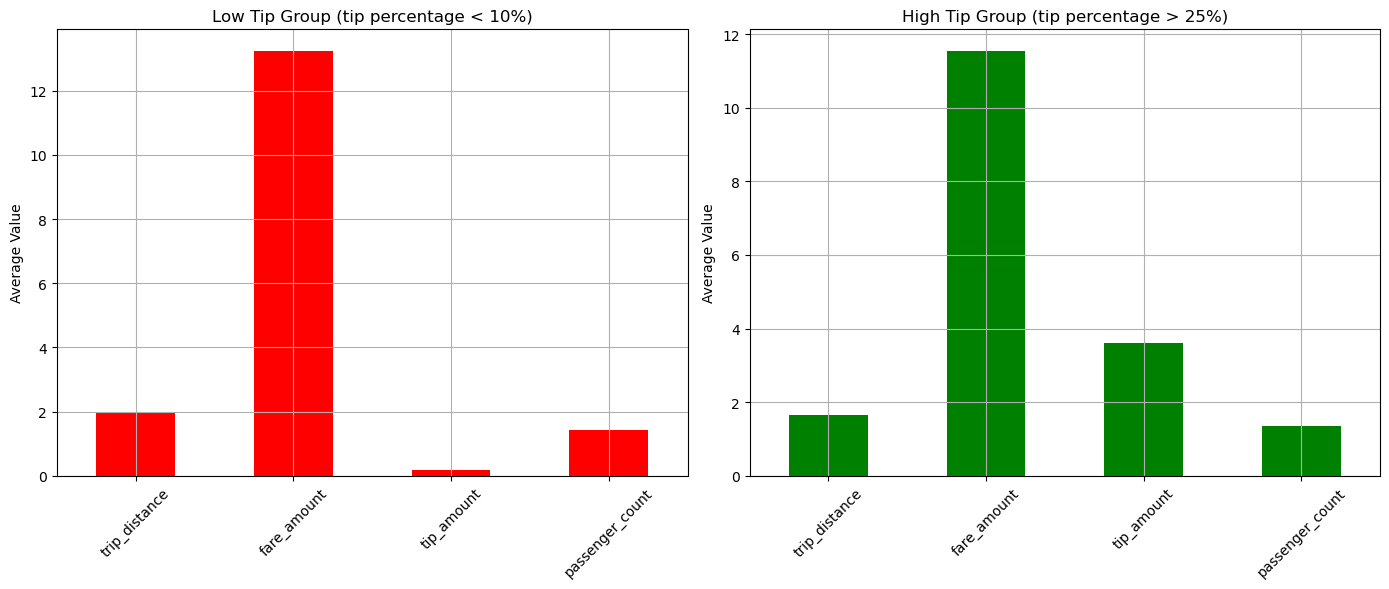

In [229]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate the tip percentage
merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

# Filter trips with tip percentage < 10% and tip percentage > 25%
low_tip_df = merged_df[merged_df['tip_percentage'] < 10]
high_tip_df = merged_df[merged_df['tip_percentage'] > 25]

# Compare average statistics for both groups
low_tip_stats = low_tip_df[['trip_distance', 'fare_amount', 'tip_amount', 'passenger_count']].mean()
high_tip_stats = high_tip_df[['trip_distance', 'fare_amount', 'tip_amount', 'passenger_count']].mean()

# Print the statistics for comparison
print("Low Tip Group (tip percentage < 10%)")
print(low_tip_stats)
print("\nHigh Tip Group (tip percentage > 25%)")
print(high_tip_stats)

# Visualize the comparison using bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for low tip group
low_tip_stats.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Low Tip Group (tip percentage < 10%)')
axes[0].set_ylabel('Average Value')
axes[0].set_xticklabels(low_tip_stats.index, rotation=45)
axes[0].grid(True)

# Plot for high tip group
high_tip_stats.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('High Tip Group (tip percentage > 25%)')
axes[1].set_ylabel('Average Value')
axes[1].set_xticklabels(high_tip_stats.index, rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

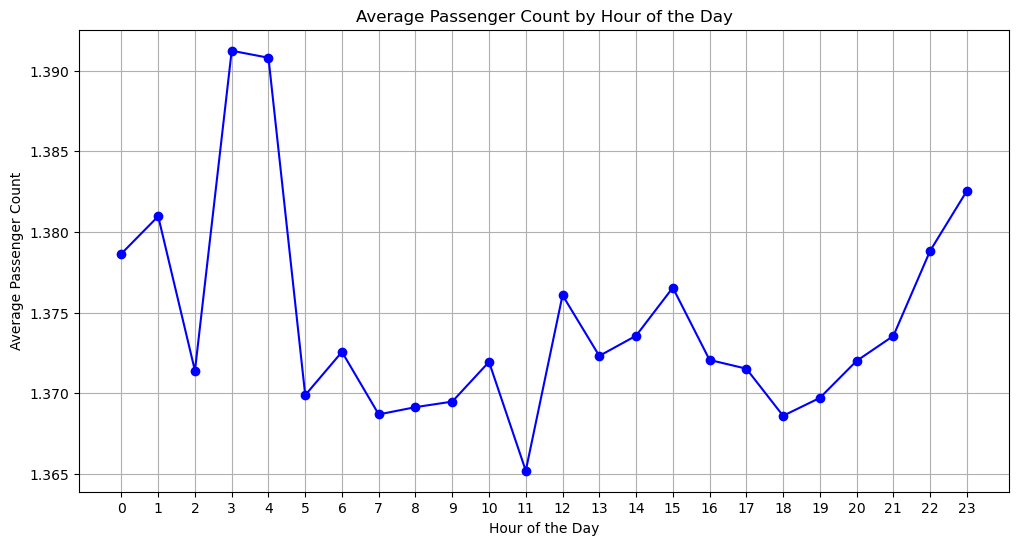

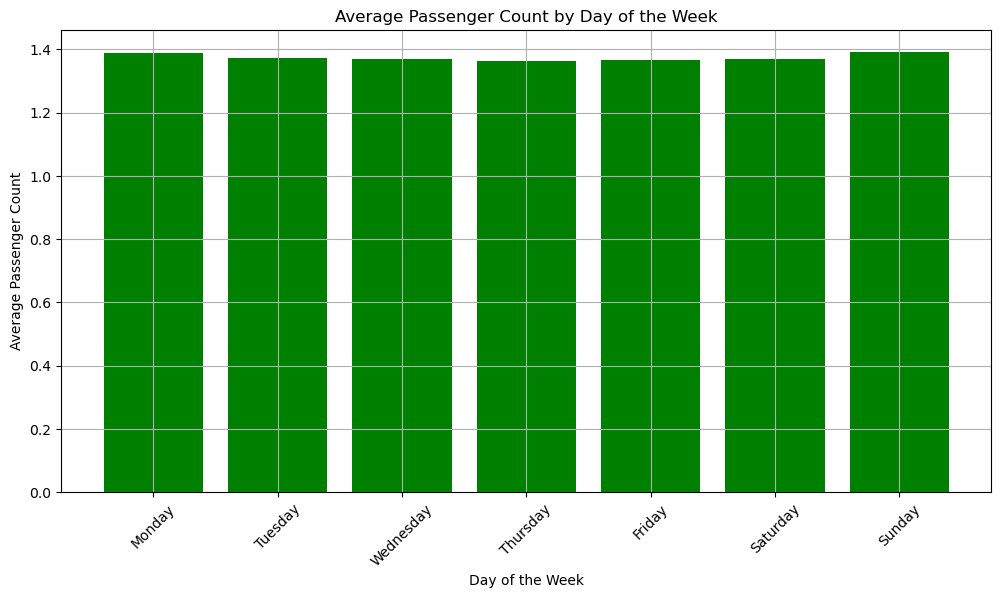

In [232]:
# See how passenger count varies across hours and days

# Group by hour of day and calculate the average passenger count
avg_passenger_count_by_hour = merged_df.groupby('hour_of_day')['passenger_count'].mean().reset_index()

# Group by day of week and calculate the average passenger count
avg_passenger_count_by_day = merged_df.groupby('day_of_week')['passenger_count'].mean().reset_index()

# Sort the days of the week for proper ordering
avg_passenger_count_by_day = avg_passenger_count_by_day.sort_values('day_of_week')
# Map the day of the week to a string 
avg_passenger_count_by_day['day_of_week'] = avg_passenger_count_by_day['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Plot the variation of passenger count across hours of the day
plt.figure(figsize=(12, 6))
plt.plot(avg_passenger_count_by_hour['hour_of_day'], avg_passenger_count_by_hour['passenger_count'], marker='o', color='blue')
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24, 1))  # Show every hour from 0 to 23
plt.show()

# Plot the variation of passenger count across days of the week
plt.figure(figsize=(12, 6))
plt.bar(avg_passenger_count_by_day['day_of_week'], avg_passenger_count_by_day['passenger_count'], color='green')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [235]:
# How does passenger count vary across zones

# Group by pickup location and calculate average passenger count for each zone
avg_passenger_count_by_pickup_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Sort the pickup locations by average passenger count 
avg_passenger_count_by_pickup_zone = avg_passenger_count_by_pickup_zone.sort_values(by='passenger_count', ascending=False)
print("Pickup locations by average passenger count")
print(avg_passenger_count_by_pickup_zone)

# Group by dropoff location and calculate average passenger count for each zone
avg_passenger_count_by_dropoff_zone = merged_df.groupby('DOLocationID')['passenger_count'].mean().reset_index()

# Sort the dropoff locations by average passenger count 
avg_passenger_count_by_dropoff_zone = avg_passenger_count_by_dropoff_zone.sort_values(by='passenger_count', ascending=False)
print("\nDropoff locations by average passenger count")
print(avg_passenger_count_by_pickup_zone)



Pickup locations by average passenger count
     PULocationID  passenger_count
42             51             2.50
195           227             2.25
159           185             2.25
84             98             2.20
3               6             2.00
..            ...              ...
90            108             1.00
38             47             1.00
94            115             1.00
96            117             1.00
117           139             1.00

[232 rows x 2 columns]

Dropoff locations by average passenger count
     PULocationID  passenger_count
42             51             2.50
195           227             2.25
159           185             2.25
84             98             2.20
3               6             2.00
..            ...              ...
90            108             1.00
38             47             1.00
94            115             1.00
96            117             1.00
117           139             1.00

[232 rows x 2 columns]


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

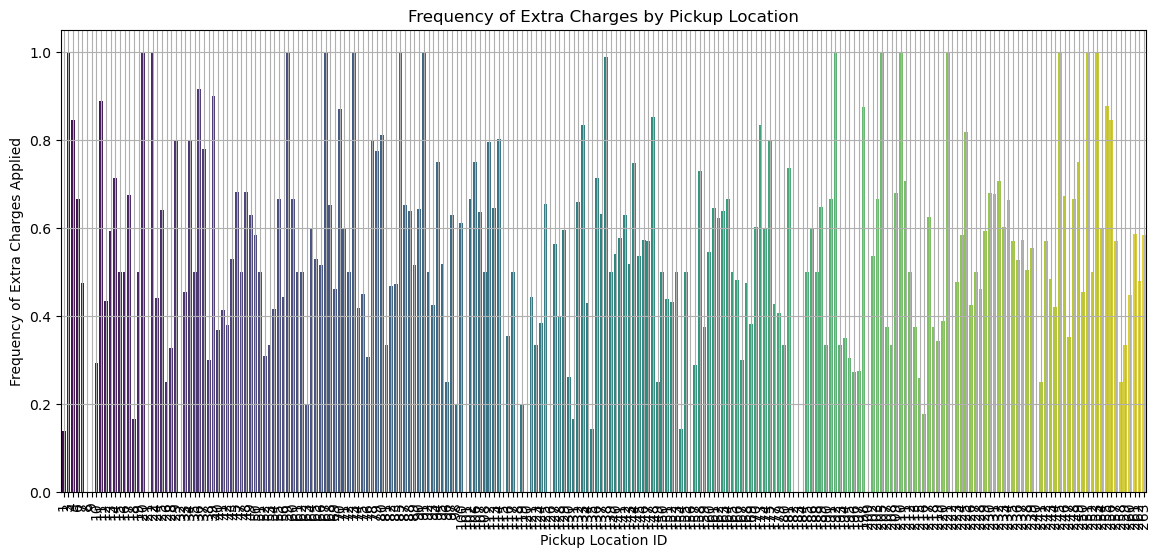

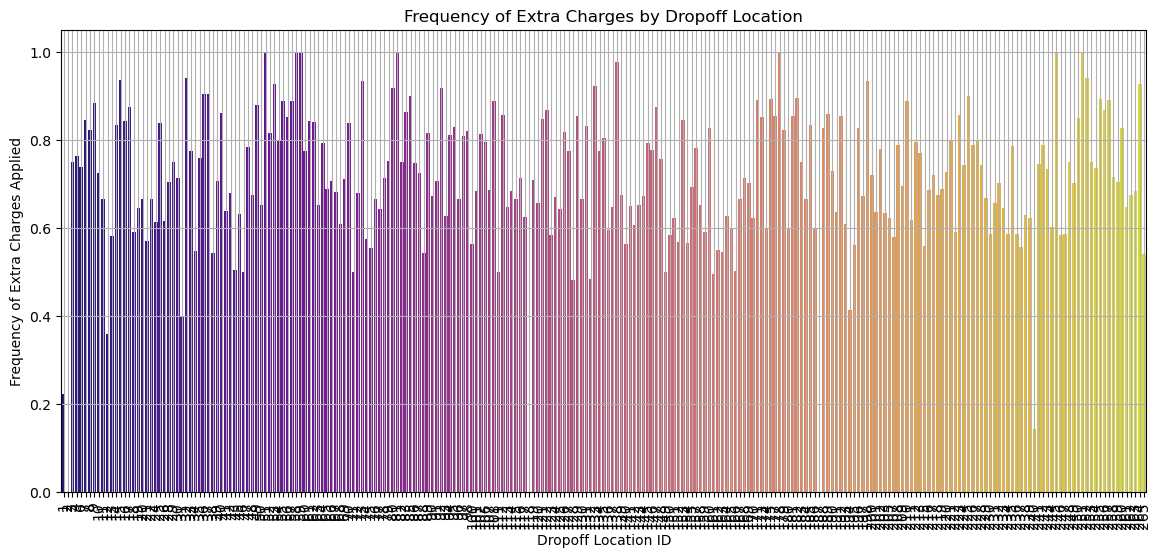

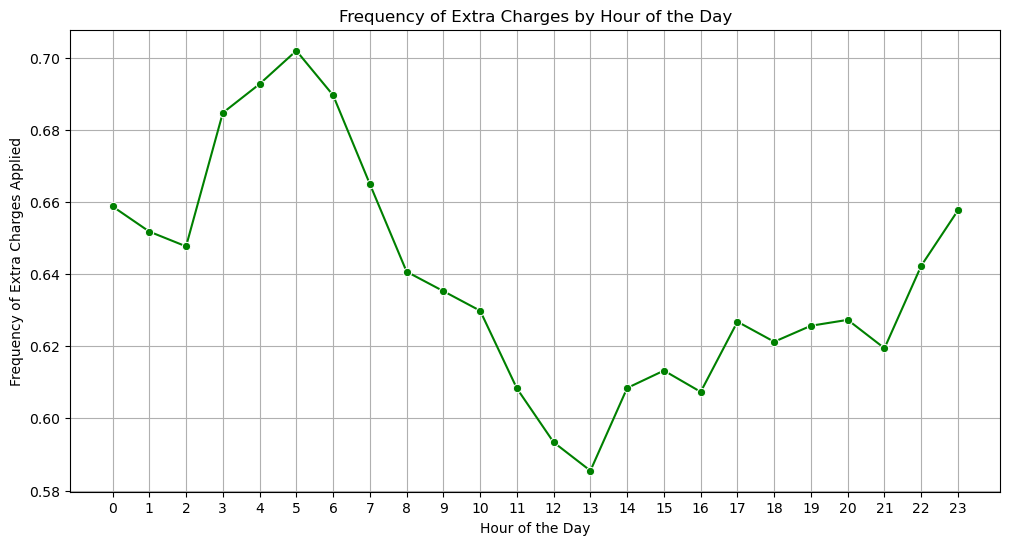

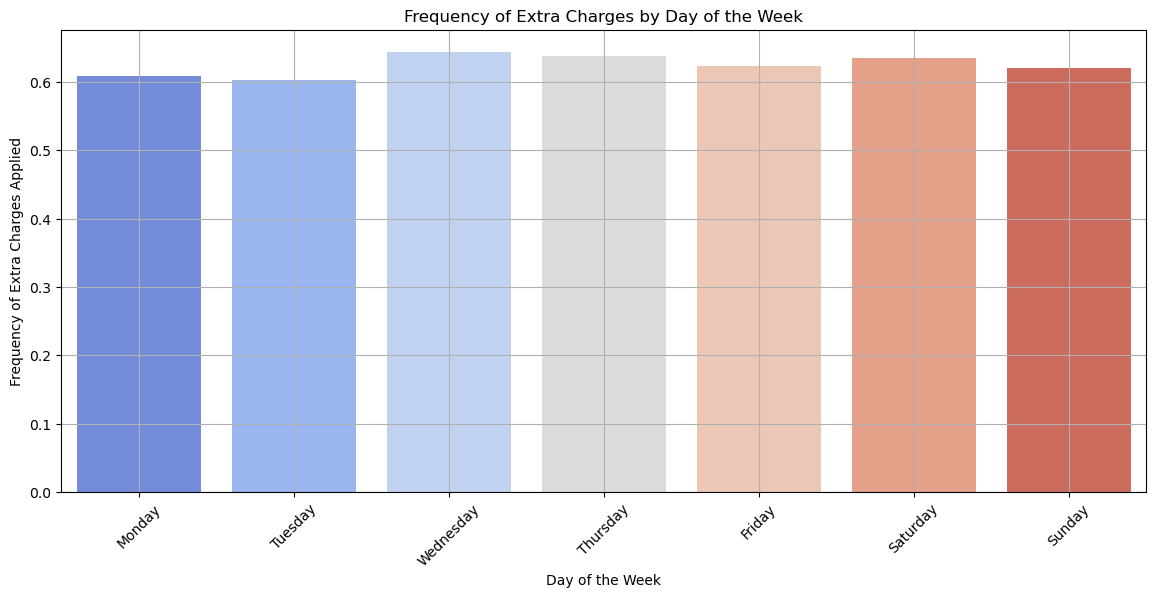

In [239]:
# How often is each surcharge applied?

# Identify rows where extra charges are applied (extra or mta_tax > 0)
merged_df['extra_charge_applied'] = (merged_df['extra'] > 0)

# Group by pickup location and calculate the percentage of trips with extra charges
extra_charge_by_pickup_zone = merged_df.groupby('PULocationID')['extra_charge_applied'].mean().reset_index()

# Sort the pickup zones by percentage of extra charges applied
extra_charge_by_pickup_zone = extra_charge_by_pickup_zone.sort_values(by='extra_charge_applied', ascending=False)

# Plot the variation of extra charge frequency across pickup zones
plt.figure(figsize=(14, 6))
sns.barplot(x='PULocationID', y='extra_charge_applied', data=extra_charge_by_pickup_zone, palette='viridis')
plt.title('Frequency of Extra Charges by Pickup Location')
plt.xlabel('Pickup Location ID')
plt.ylabel('Frequency of Extra Charges Applied')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Group by dropoff location and calculate the percentage of trips with extra charges
extra_charge_by_dropoff_zone = merged_df.groupby('DOLocationID')['extra_charge_applied'].mean().reset_index()

# Sort the dropoff zones by percentage of extra charges applied
extra_charge_by_dropoff_zone = extra_charge_by_dropoff_zone.sort_values(by='extra_charge_applied', ascending=False)

# Plot the variation of extra charge frequency across dropoff zones
plt.figure(figsize=(14, 6))
sns.barplot(x='DOLocationID', y='extra_charge_applied', data=extra_charge_by_dropoff_zone, palette='plasma')
plt.title('Frequency of Extra Charges by Dropoff Location')
plt.xlabel('Dropoff Location ID')
plt.ylabel('Frequency of Extra Charges Applied')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Group by hour of day and calculate the percentage of trips with extra charges
extra_charge_by_hour = merged_df.groupby('hour_of_day')['extra_charge_applied'].mean().reset_index()

# Plot the variation of extra charge frequency across hours of the day
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='extra_charge_applied', data=extra_charge_by_hour, marker='o', color='green')
plt.title('Frequency of Extra Charges by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Extra Charges Applied')
plt.grid(True)
plt.xticks(range(0, 24, 1))  # Show every hour from 0 to 23
plt.show()

# Group by day of week and calculate the percentage of trips with extra charges
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.strftime('%A')  # Get day of the week as a string (e.g., Monday)

# Ensure the days are in the correct order
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['day_of_week'] = pd.Categorical(merged_df['day_of_week'], categories=days_of_week_order, ordered=True)

extra_charge_by_day = merged_df.groupby('day_of_week')['extra_charge_applied'].mean().reset_index()

# Plot the variation of extra charge frequency across days of the week
plt.figure(figsize=(14, 6))
sns.barplot(x='day_of_week', y='extra_charge_applied', data=extra_charge_by_day, palette='coolwarm')
plt.title('Frequency of Extra Charges by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency of Extra Charges Applied')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Observations:
It has been observed that taxi pickups are more during 5pm to 8pm with 6pm as the peak hour. Also,increased demand between Tuesday and Saturday with Thursday being the peak day. Hence, it should be ensured that there are availability during peak hours and weekdays. 

Promotional offers needs to be rolled out during weekends, off hours to increase demand and revenue.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Answer:
Zone ‘Upper East Side South’ has highest number of trips followed by ‘Midtown Center’ and ‘Upper East Side North’ and all of them belong to borough ‘Manhattan’. Busiest hours are 3pm to 7pm with highest at 6pm. Weekday has higher demands than weekends. Revenue share of daytime is 88.58% while nightime revenue share is 11.42%. Tip percentage increase post 4pm and is highest after 8pm.Night time has more extra charges applied to the fare. It is more from 11pm to 6am with highest during 5am.

Hence its suggested to have availability across above high demand zones and peak hours and during weekdays. Promotional offers needs to be rolled out during weekends, off hours to increase demand and revenue.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Data driven observations:

From revenue perspective, it has been observed that May and October generates highest monthly revenue.Revenue is lowest in Feb and August
Quarter Q2 and Q4 generate the highest revenue. Q3 has the lowest revenue. Revenue share of daytime is 88.58% while nightime revenue share is 11.42%
With increase in passenger count, fare per mile per passenger increases. So, single passenger trip is highest with 11. Day of week does not have any significant trend for average fare per mile  . Hour of day  does not have any significant trend for average fare per mile  . Fare per mile for Vendor 2 is higher than for Vendor 1 . Tip percentage is higher for trip distance upto 2 miles and decreases gradually post that. Tip percentage increase post 4pm and is highest after 8pm .Night time has more extra charges applied to the fare. It is more from 11pm to 6am with highest during 5am.


Hence,for the months and quarters with lowest revenue, there should be more focus to increase revenue.

